# FIFA World Cup 2018 
<img src="files/Russia2018.jpg">

# Import Dependencies
-  Libraries and Modules
-  API Key
-  Define base url

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scipy
from datetime import datetime
# url to fifa data csv
fifa_url = 'https://worldcup.sfg.io/teams/results'

# 1. Data Preaparation

## Extract Squad Data

In [2]:
## National teams at the 2018 FIFA World Cup in Russia by average age of players (in years)
# Source File: https://www.kaggle.com/jonathanbouchet/fifa-world-cup-2018-players-stats/data
# Dataset #1  Read CSV
fifa_squads = pd.read_csv("2018 FIFA World Cup Squads2.csv", encoding = "ISO-8859-1")
fifa_players = pd.read_csv("wc2018-players2.csv", encoding = "ISO-8859-1")


In [3]:
# List of Final 8 FIFA WC2018 Teams/Countries
final8 = ["Belgium","Brazil","Croatia", "England", "France", "Russia", "Sweden", "Uruguay"]

In [4]:
# Merge the two datasets together# Merge 
combined_fifa_data = pd.merge(fifa_squads, fifa_players, on="Index Field")
merged_df = pd.DataFrame(combined_fifa_data)
merged_df.index = merged_df["Index Field"]
#del merged_df["Team_y"]
del merged_df["Pos."]
del merged_df["#"]
del merged_df["Birth Date"]
del merged_df["Player Count"]
del merged_df["Club_x"]
del merged_df["FIFA Popular Name"]
del merged_df["Index Field"]
del merged_df["Shirt Name"]
merged_df.tail(1)

Team_x Group  Squad Number Position        Player  \
Index Field                                                            
Senegal23GK34217  Senegal     H            23       GK  Alfred Gomis   

                 Date Of Birth  Age  Caps  Goals   Team_y              Club_y  \
Index Field                                                                     
Senegal23GK34217      9/5/1993   24     1      0  Senegal  SPAL Ferrara (ITA)   

                  Height  Weight  
Index Field                       
Senegal23GK34217     196      80

In [5]:
# Groupby Team
df1 = pd.DataFrame(merged_df)
g1 = df1.groupby( ["Team_x"] ).mean()
# g1.tail(1)
g1.reset_index(inplace = True)
g1.head(2)

Team_x  Squad Number        Age       Caps     Goals      Height  \
0  Argentina          12.0  28.695652  36.521739  7.478261  178.434783   
1  Australia          12.0  27.608696  29.086957  5.217391  180.869565   

      Weight  
0  75.565217  
1  77.739130

In [6]:
g1.set_index('Team_x', inplace=True)

## Retreive Team Data from FIFA API
-  Load the data into a df
-  Set country as the index of the df

In [7]:
#request data on all the teams in the 2018 World cup
response = requests.get(fifa_url).json()
teams_df = pd.DataFrame(response)
teams_df.index = teams_df['country']
del teams_df['alternate_name']

In [8]:
#set country as index delete alternate_name series
teams_df.index = teams_df["country"]
teams_df.head(2)

country  draws fifa_code  games_played  \
country                                                         
Korea Republic  Korea Republic      0       KOR             3   
Germany                Germany      0       GER             3   

                goal_differential  goals_against  goals_for  group_id  \
country                                                                 
Korea Republic                  0              3          3         6   
Germany                        -2              4          2         6   

               group_letter  id  losses  points  wins  
country                                                
Korea Republic            F  24       2       3     1  
Germany                   F  21       2       3     1

## Retreive Match Data from FIFA API
-  Load the data into a df


In [9]:
# Import csv *** contains JSONS format in some indeces ***

matches_url = 'https://worldcup.sfg.io/matches'
match_df = pd.DataFrame(requests.get(matches_url).json())
match_df.tail()

attendance                                          away_team  \
59      44287  {'country': 'Croatia', 'code': 'CRO', 'goals':...   
60      64286  {'country': 'Belgium', 'code': 'BEL', 'goals':...   
61      78011  {'country': 'England', 'code': 'ENG', 'goals':...   
62      64406  {'country': 'England', 'code': 'ENG', 'goals':...   
63      78011  {'country': 'Croatia', 'code': 'CRO', 'goals':...   

   away_team_country                                   away_team_events  \
59           Croatia  [{'id': 1095, 'type_of_event': 'yellow-card', ...   
60           Belgium  [{'id': 1122, 'type_of_event': 'substitution-o...   
61           England  [{'id': 1137, 'type_of_event': 'goal', 'player...   
62           England  [{'id': 1163, 'type_of_event': 'substitution-o...   
63           Croatia  [{'id': 1178, 'type_of_event': 'goal-own', 'pl...   

                                 away_team_statistics              datetime  \
59  {'country': 'Croatia', 'attempts_on_goal': 17,...  2018-07-07T18:00:00Z   
60  {'country': 'Belgium', 'attempts_on_goal': 9, ...  2018-07-10T18:00:00Z   
61  {'country': 'England', 'attempts_on_goal': 11,...  2018-07-11T18:00:00Z   
62  {'country': 'England', 'attempts_on_goal': 15,...  2018-07-14T14:00:00Z   
63  {'country': 'Croatia', 'attempts_on_goal': 15,...  2018-07-15T15:00:00Z   

      fifa_id                                          home_team  \
59  300331504  {'country': 'Russia', 'code': 'RUS', 'goals': ...   
60  300331531  {'country': 'France', 'code': 'FRA', 'goals': ...   
61  300331522  {'country': 'Croatia', 'code': 'CRO', 'goals':...   
62  300331536  {'country': 'Belgium', 'code': 'BEL', 'goals':...   
63  300331552  {'country': 'France', 'code': 'FRA', 'goals': ...   

   home_team_country                                   home_team_events  \
59            Russia  [{'id': 1094, 'type_of_event': 'goal', 'player...   
60            France  [{'id': 1121, 'type_of_event': 'goal', 'player...   
61           Croatia  [{'id': 1138, 'type_of_event': 'yellow-card', ...   
62           Belgium  [{'id': 1160, 'type_of_event': 'goal', 'player...   
63            France  [{'id': 1179, 'type_of_event': 'yellow-card', ...   

       ...      last_score_update_at                  location  \
59     ...      2018-07-07T20:51:30Z             Fisht Stadium   
60     ...      2018-07-10T19:54:35Z  Saint Petersburg Stadium   
61     ...      2018-07-11T20:37:36Z          Luzhniki Stadium   
62     ...      2018-07-14T15:52:28Z  Saint Petersburg Stadium   
63     ...      2018-07-15T16:54:32Z          Luzhniki Stadium   

                                            officials  \
59  [Sandro RICCI, Emerson DE CARVALHO, Marcelo VA...   
60  [Andres CUNHA, Nicolas TARAN, Mauricio ESPINOS...   
61  [Cuneyt CAKIR, Bahattin DURAN, Tarik ONGUN, Bj...   
62  [Alireza FAGHANI, Reza SOKHANDAN, Mohammadreza...   
63  [Nestor PITANA, Hernan MAIDANA, Juan Pablo BEL...   

                  stage_name     status       time           venue  \
59            Quarter-finals  completed  full-time           Sochi   
60               Semi-finals  completed  full-time  St. Petersburg   
61               Semi-finals  completed  full-time          Moscow   
62  Play-off for third place  completed  full-time  St. Petersburg   
63                     Final  completed  full-time          Moscow   

                                              weather   winner winner_code  
59  {'humidity': '70', 'temp_celsius': '24', 'temp...  Croatia         CRO  
60  {'humidity': '75', 'temp_celsius': '18', 'temp...   France         FRA  
61  {'humidity': '64', 'temp_celsius': '21', 'temp...  Croatia         CRO  
62  {'humidity': '45', 'temp_celsius': '26', 'temp...  Belgium         BEL  
63  {'humidity': '51', 'temp_celsius': '27', 'temp...   France         FRA  

[5 rows x 22 columns]

## Retreive Country Data 

In [10]:
# build list of away team's countries
country_list_away = []

for ac in range(len(match_df["away_team_statistics"])):
    away_country = match_df["away_team_statistics"][ac]["country"]
    country_list_away.append(away_country)
    
# toggle to view list
# country_list_away

# build list of home team's countries
country_list_home = []

for hc in range(len(match_df["home_team_statistics"])):
    home_country = match_df["home_team_statistics"][hc]["country"]
    country_list_home.append(home_country)
    
# toggle to view list
# country_list_home

## Extract event times for goals
-  Create a dictionary for goal times in each stage of the tournament
-  Import that dictionary into a dataframe
-  Pull data into data frame using a nested for loop

In [11]:
# set up dicts for goal_times per stage
goal_times_dict = {
    'First stage':{},
    'Round of 16':{},
    'Quarter-finals': {},
    'Semi-finals': {},
    'Play-off for third place':{},
    'Final':{} 
}

# create empty DF for ?
goal_times_means = pd.DataFrame()

# loop through data to get ?
for index, match in match_df.iterrows():
    
    # variables for 
    home = match['home_team_country']
    away = match['away_team_country']
    home_event = match['home_team_events']
    away_event = match['away_team_events']
    team_events = [home_event, away_event]
    teams = [home, away]
    goal_times = goal_times_dict[match['stage_name']]
    
    
    for events in team_events:
        team = teams[team_events.index(events)]
        for event in events: 
            if (event['type_of_event'] == 'goal'):
                time = event['time']
                time = time.replace("'", "")
                
                try:
                    time = int(time)
                except:
                    time = eval(time)
                    
                if team in goal_times:
                    goal_times[team].append(time)
                else:
                    goal_times[team] = []
                    goal_times[team].append(time)
            else:
                continue

for stage in goal_times_dict:
    for country in goal_times_dict[stage]:
        goal_times_means.loc[country, stage] = np.mean(goal_times_dict[stage][country])

## Combine data from all stages
-  Create a list variable to hold data gathered in the following for loop
-  For loop gathers data from each stage of the tournament for a particular team
-  Take the average of the list to get the cumulative average scoring time
-  Append these values to a new column in the df

In [12]:
combined_avg = []

for x in range(len(goal_times_means)):
    temp_avg = goal_times_means.iloc[x].dropna()
    temp_avg = temp_avg.mean()
    combined_avg.append(temp_avg)
    
goal_times_means["combined_avg"] = combined_avg

## Merge data of interest into the df
-  Wins
-  Points
-  Goal Differential
-  Losses
-  Goals Against

In [13]:
reindexed_combined_df = goal_times_means.reset_index()
reindexed_combined_df = reindexed_combined_df.rename(index=str, columns={"index": "country"})
merged_df = pd.merge(reindexed_combined_df, teams_df[["country", "wins"]], on = "country", how = "left")
merged_df = pd.merge(merged_df,teams_df[['country','points']],on='country', how='left')
merged_df = pd.merge(merged_df,teams_df[['country','goal_differential']],on='country', how='left')
merged_df = pd.merge(merged_df,teams_df[['country','losses']],on='country', how='left')
merged_df = pd.merge(merged_df,teams_df[['country','goals_against']],on='country', how='left')
merged_df.head(2)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: FutureWarning: 'country' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


country  First stage  Round of 16  Quarter-finals  Semi-finals  \
0   Russia    61.714286          NaN            73.0          NaN   
1  Uruguay    47.000000         34.5             NaN          NaN   

   Play-off for third place  Final  combined_avg  wins  points  \
0                       NaN    NaN     67.357143     2       8   
1                       NaN    NaN     40.750000     4      12   

   goal_differential  losses  goals_against  
0                  4       1              7  
1                  4       1              3

## Construct statlist
-  set up empty list and append to it
-  get passes completed for the away team
-  get passes completed for the home team
-  build passes completed including country
-  concat both dataframes together to make one long list

In [14]:
statslist = ["passes_completed", "attempts_on_goal","ball_possession", "pass_accuracy",
             "balls_recovered", "distance_covered", "tackles", "fouls_committed"]

big_df = pd.DataFrame()

for stat in statslist:
    
    completed_passes_a = []

    for s in range(len(match_df["away_team_statistics"])):
        passes = match_df["away_team_statistics"][s][stat]
        completed_passes_a.append(passes)
    
    completed_passes_h = []

    for s in range(len(match_df["home_team_statistics"])):
        passes = match_df["home_team_statistics"][s][stat]
        completed_passes_h.append(passes)
    #completed_passes_h
    
    # concat both dataframes together to make one long list
    away_df = pd.DataFrame({"Country": match_df["away_team_country"], 
                           f"{stat}": completed_passes_a})
    home_df = pd.DataFrame({"Country": match_df["home_team_country"],
                           f"{stat}": completed_passes_h})
    #    "Country": match_df["away_team_country"],
    #    "Passes Completed": completed_passes_a})

    #passes_completed_df_h = pd.DataFrame({
     #   "Country": match_df["home_team_country"],
      #  "Passes Completed": completed_passes_h})
    #concating the two df together
    concat = away_df.append(home_df, ignore_index=True, verify_integrity=False, sort=None)
    big_df[stat] = concat[stat]
    big_df["Country"] = concat['Country']
    
big_df.head()

passes_completed       Country  attempts_on_goal  ball_possession  \
0               442  Saudi Arabia                 6               60   
1               508       Uruguay                14               57   
2               129          Iran                 8               36   
3               677         Spain                12               61   
4               332     Australia                 4               49   

   pass_accuracy  balls_recovered  distance_covered  tackles  fouls_committed  
0             86               48               105       16             10.0  
1             86               54               111        8              6.0  
2             66               38               100       14             14.0  
3             93               28               103        7             10.0  
4             85               49               111       15             19.0

In [15]:
# toggle to view away_team_statistics indeces json layout

match_df.iloc[0,4]

{'country': 'Saudi Arabia',
 'attempts_on_goal': 6,
 'on_target': 0,
 'off_target': 3,
 'blocked': 3,
 'woodwork': 0,
 'corners': 2,
 'offsides': 1,
 'ball_possession': 60,
 'pass_accuracy': 86,
 'num_passes': 511,
 'passes_completed': 442,
 'distance_covered': 105,
 'balls_recovered': 48,
 'tackles': 16,
 'clearances': 31,
 'yellow_cards': 1,
 'red_cards': 0,
 'fouls_committed': 10,
 'tactics': '4-5-1',
 'starting_eleven': [{'name': 'ABDULLAH ALMUAIOUF',
   'captain': False,
   'shirt_number': 1,
   'position': 'Goalie'},
  {'name': 'OSAMA HAWSAWI',
   'captain': True,
   'shirt_number': 3,
   'position': 'Defender'},
  {'name': 'OMAR HAWSAWI',
   'captain': False,
   'shirt_number': 5,
   'position': 'Defender'},
  {'name': 'MOHAMMED ALBURAYK',
   'captain': False,
   'shirt_number': 6,
   'position': 'Defender'},
  {'name': 'SALMAN ALFARAJ',
   'captain': False,
   'shirt_number': 7,
   'position': 'Midfield'},
  {'name': 'YAHIA ALSHEHRI',
   'captain': False,
   'shirt_number': 8,


## Find total number of games played by each country

In [17]:
num_of_games = big_df["Country"].value_counts()
num_of_games

England           7
Belgium           7
France            7
Croatia           7
Brazil            5
Sweden            5
Russia            5
Uruguay           5
Denmark           4
Argentina         4
Portugal          4
Spain             4
Japan             4
Mexico            4
Switzerland       4
Colombia          4
Egypt             3
Germany           3
Iceland           3
Morocco           3
Panama            3
Korea Republic    3
Australia         3
Senegal           3
Poland            3
Serbia            3
Nigeria           3
Peru              3
Iran              3
Costa Rica        3
Tunisia           3
Saudi Arabia      3
Name: Country, dtype: int64

## Group by Country
-  sum on the groupby country
-  rename series title
-  took country out of undex and set index back to numerals
-  set up new series with avg shots per game by dividing total shots by number of games

In [18]:
groups = big_df.groupby("Country", as_index = True).sum()


groups["Number of Games"] = num_of_games


groups.reset_index(inplace = True)

for stat in statslist:

    groups[f"Avg {stat}"] = round(groups[stat]/groups["Number of Games"], 1)
groups.head()

Country  passes_completed  attempts_on_goal  ball_possession  \
0  Argentina              1998                53              255   
1  Australia              1243                32              154   
2    Belgium              3169               106              369   
3     Brazil              2409               103              280   
4   Colombia              1446                39              199   

   pass_accuracy  balls_recovered  distance_covered  tackles  fouls_committed  \
0            341              139               398       71             55.0   
1            253              123               329       28             37.0   
2            602              248               727       44             97.0   
3            429              222               503       36             50.0   
4            321              183               435       59             53.0   

   Number of Games  Avg passes_completed  Avg attempts_on_goal  \
0                4                 499.5                  13.2   
1                3                 414.3                  10.7   
2                7                 452.7                  15.1   
3                5                 481.8                  20.6   
4                4                 361.5                   9.8   

   Avg ball_possession  Avg pass_accuracy  Avg balls_recovered  \
0                 63.8               85.2                 34.8   
1                 51.3               84.3                 41.0   
2                 52.7               86.0                 35.4   
3                 56.0               85.8                 44.4   
4                 49.8               80.2                 45.8   

   Avg distance_covered  Avg tackles  Avg fouls_committed  
0                  99.5         17.8                 13.8  
1                 109.7          9.3                 12.3  
2                 103.9          6.3                 13.9  
3                 100.6          7.2                 10.0  
4                 108.8         14.8                 13.2

## Getting first goal time of each game for each team 

In [19]:
Goals_df = pd.DataFrame()
first_goal_away = []
for s in range(len(match_df["away_team_events"])):
    events = match_df["away_team_events"][s]
    match_goals=[]
    for event in events:
        if (event['type_of_event'] == 'goal'):
            time = event['time']
            time = time.replace("'", "")
            try:
                time = int(time)
            except:
                time = eval(time) 
            match_goals.append(time)
        elif(event['type_of_event'] == 'goal-penalty'):
            time = event['time']
            time = time.replace("'", "")
            try:
                time = int(time)
            except:
                time = eval(time)
            match_goals.append(time)
        else:
            continue
    if(len(match_goals)>0):
        first_goal_away.append(min(match_goals))
    else:
        first_goal_away.append(0)
        
first_goal_home = []
    
for s in range(len(match_df["home_team_events"])):
    events = match_df["home_team_events"][s]
    match_goals=[]
    for event in events:
        if (event['type_of_event'] == 'goal'):
            time = event['time']
            time = time.replace("'", "")
            try:
                time = int(time)
            except:
                time = eval(time) 
            match_goals.append(time)
        elif(event['type_of_event'] == 'goal-penalty'):
            time = event['time']
            time = time.replace("'", "")
            try:
                time = int(time)
            except:
                time = eval(time)
            match_goals.append(time)
        else:
            continue
            #print(match_goals)
    if (len(match_goals)>0):
        first_goal_home.append(min(match_goals))
    else:
        first_goal_home.append(0)
        
    
away_df = pd.DataFrame({"Country": match_df["away_team_country"], 
                           "First goals": first_goal_away})
home_df = pd.DataFrame({"Country": match_df["home_team_country"],
                           "First goals": first_goal_home})

concat = away_df.append(home_df, ignore_index=True, verify_integrity=False, sort=None)
Goals_df["First Goals"] = concat["First goals"]
Goals_df["Country"] = concat['Country']

#Goals_df

In [20]:
Goals_df_dropped= Goals_df[Goals_df['First Goals']!=0]
goal_means = Goals_df_dropped.groupby('Country', as_index = False).mean()

# 2. Visualize the Data

## Chart Squad Stats
-  Average Age for Teams
-  Average Height for Teams
-  Average Weight for Teams
-  Average Caps for Teams

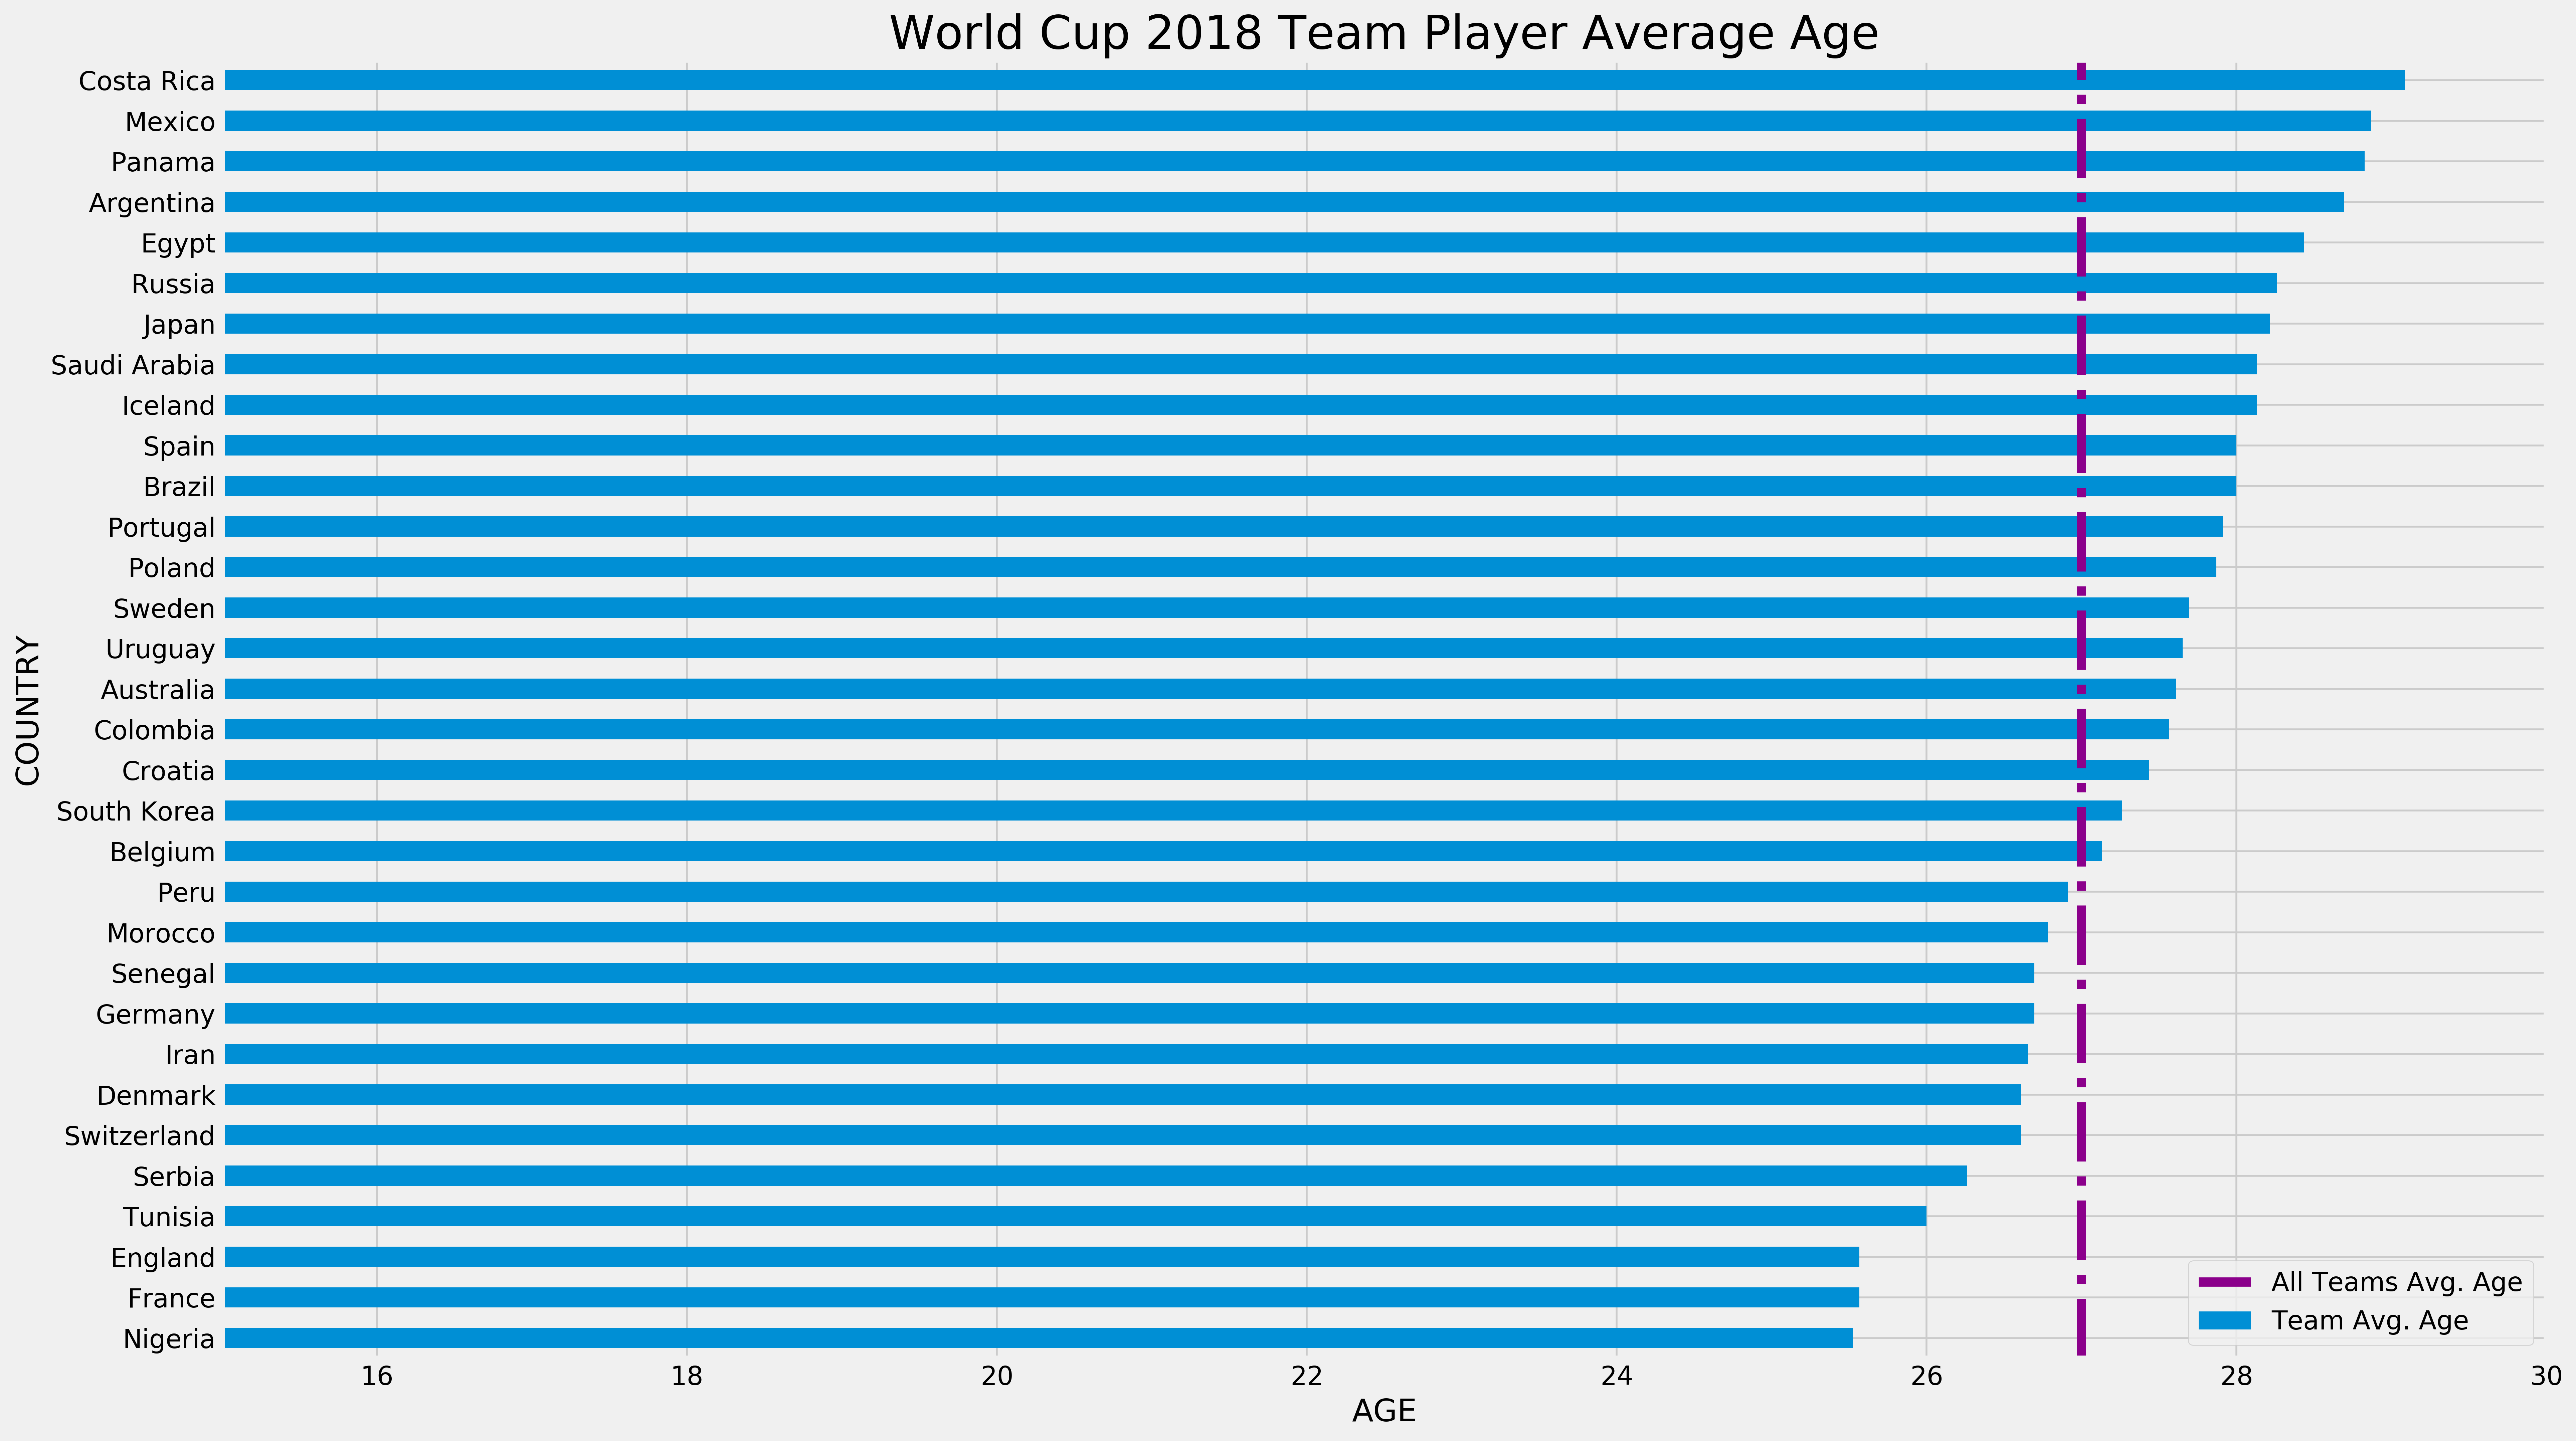

In [21]:
# Average Age for Teams
plt.rcParams["figure.dpi"] = 400
plt.style.use('fivethirtyeight')
g1.sort_values(by="Age", inplace=True)

ax = g1[['Age']].plot(figsize = (20, 12),kind="barh")
ax.set_xlabel("AGE")
ax.set_ylabel("COUNTRY")
ax.set_xlim(15,30)
plt.title("World Cup 2018 Team Player Average Age", fontsize=25)
plt.axvline(27,c="darkmagenta",linestyle="dashdot", linewidth=5)  #Average Age for ALL Players
plt.legend(["All Teams Avg. Age","Team Avg. Age"], loc=0)
plt.savefig("Avg_Age.png",orientation='landscape',format="png",dpi=100)

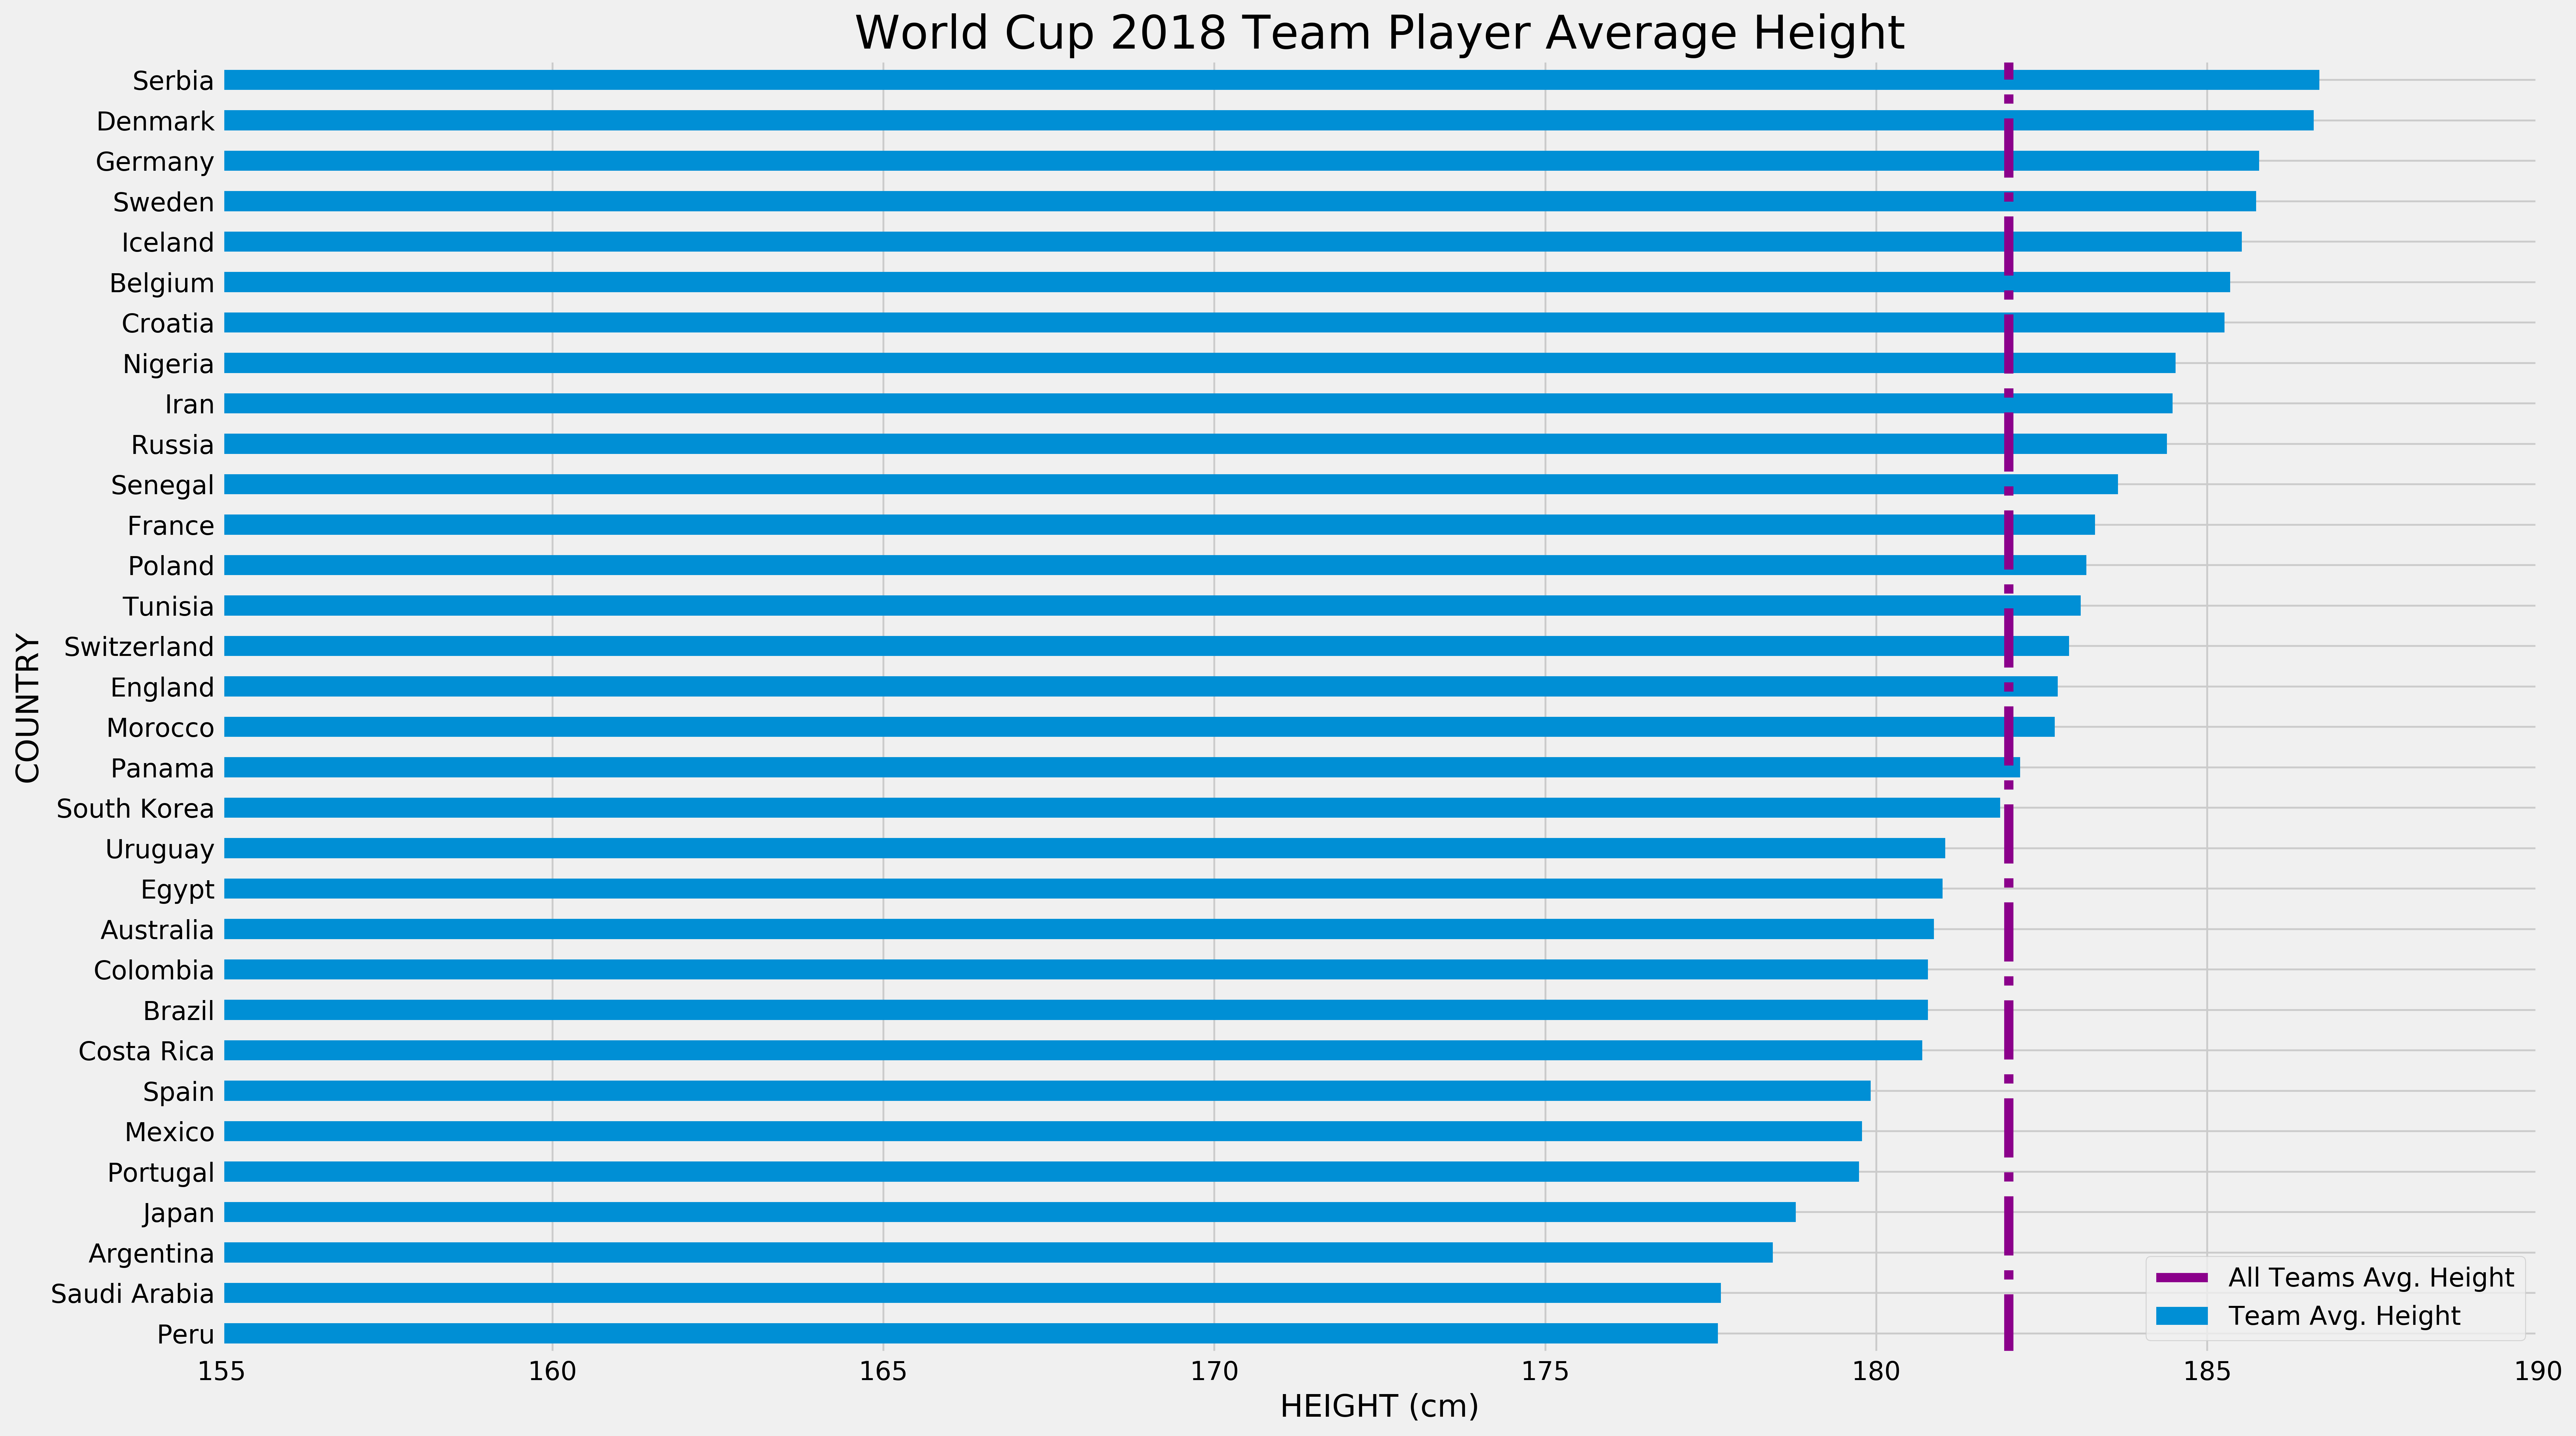

In [22]:
# Average Height for Teams
plt.rcParams["figure.dpi"] = 400
plt.style.use('fivethirtyeight')
g1.sort_values(by="Height", inplace=True)

ax = g1[["Height"]].plot(figsize = (20, 12),kind="barh")
ax.set_xlabel("HEIGHT (cm)")
ax.set_ylabel("COUNTRY")
ax.set_xlim(155,190)
plt.title("World Cup 2018 Team Player Average Height", fontsize=25)
plt.axvline(182,c="darkmagenta",linestyle="dashdot", linewidth=5)  #Average for ALL Players
plt.legend(["All Teams Avg. Height","Team Avg. Height"], loc=0)
plt.savefig("Avg_Height.png",orientation='landscape',format="png",dpi=100)

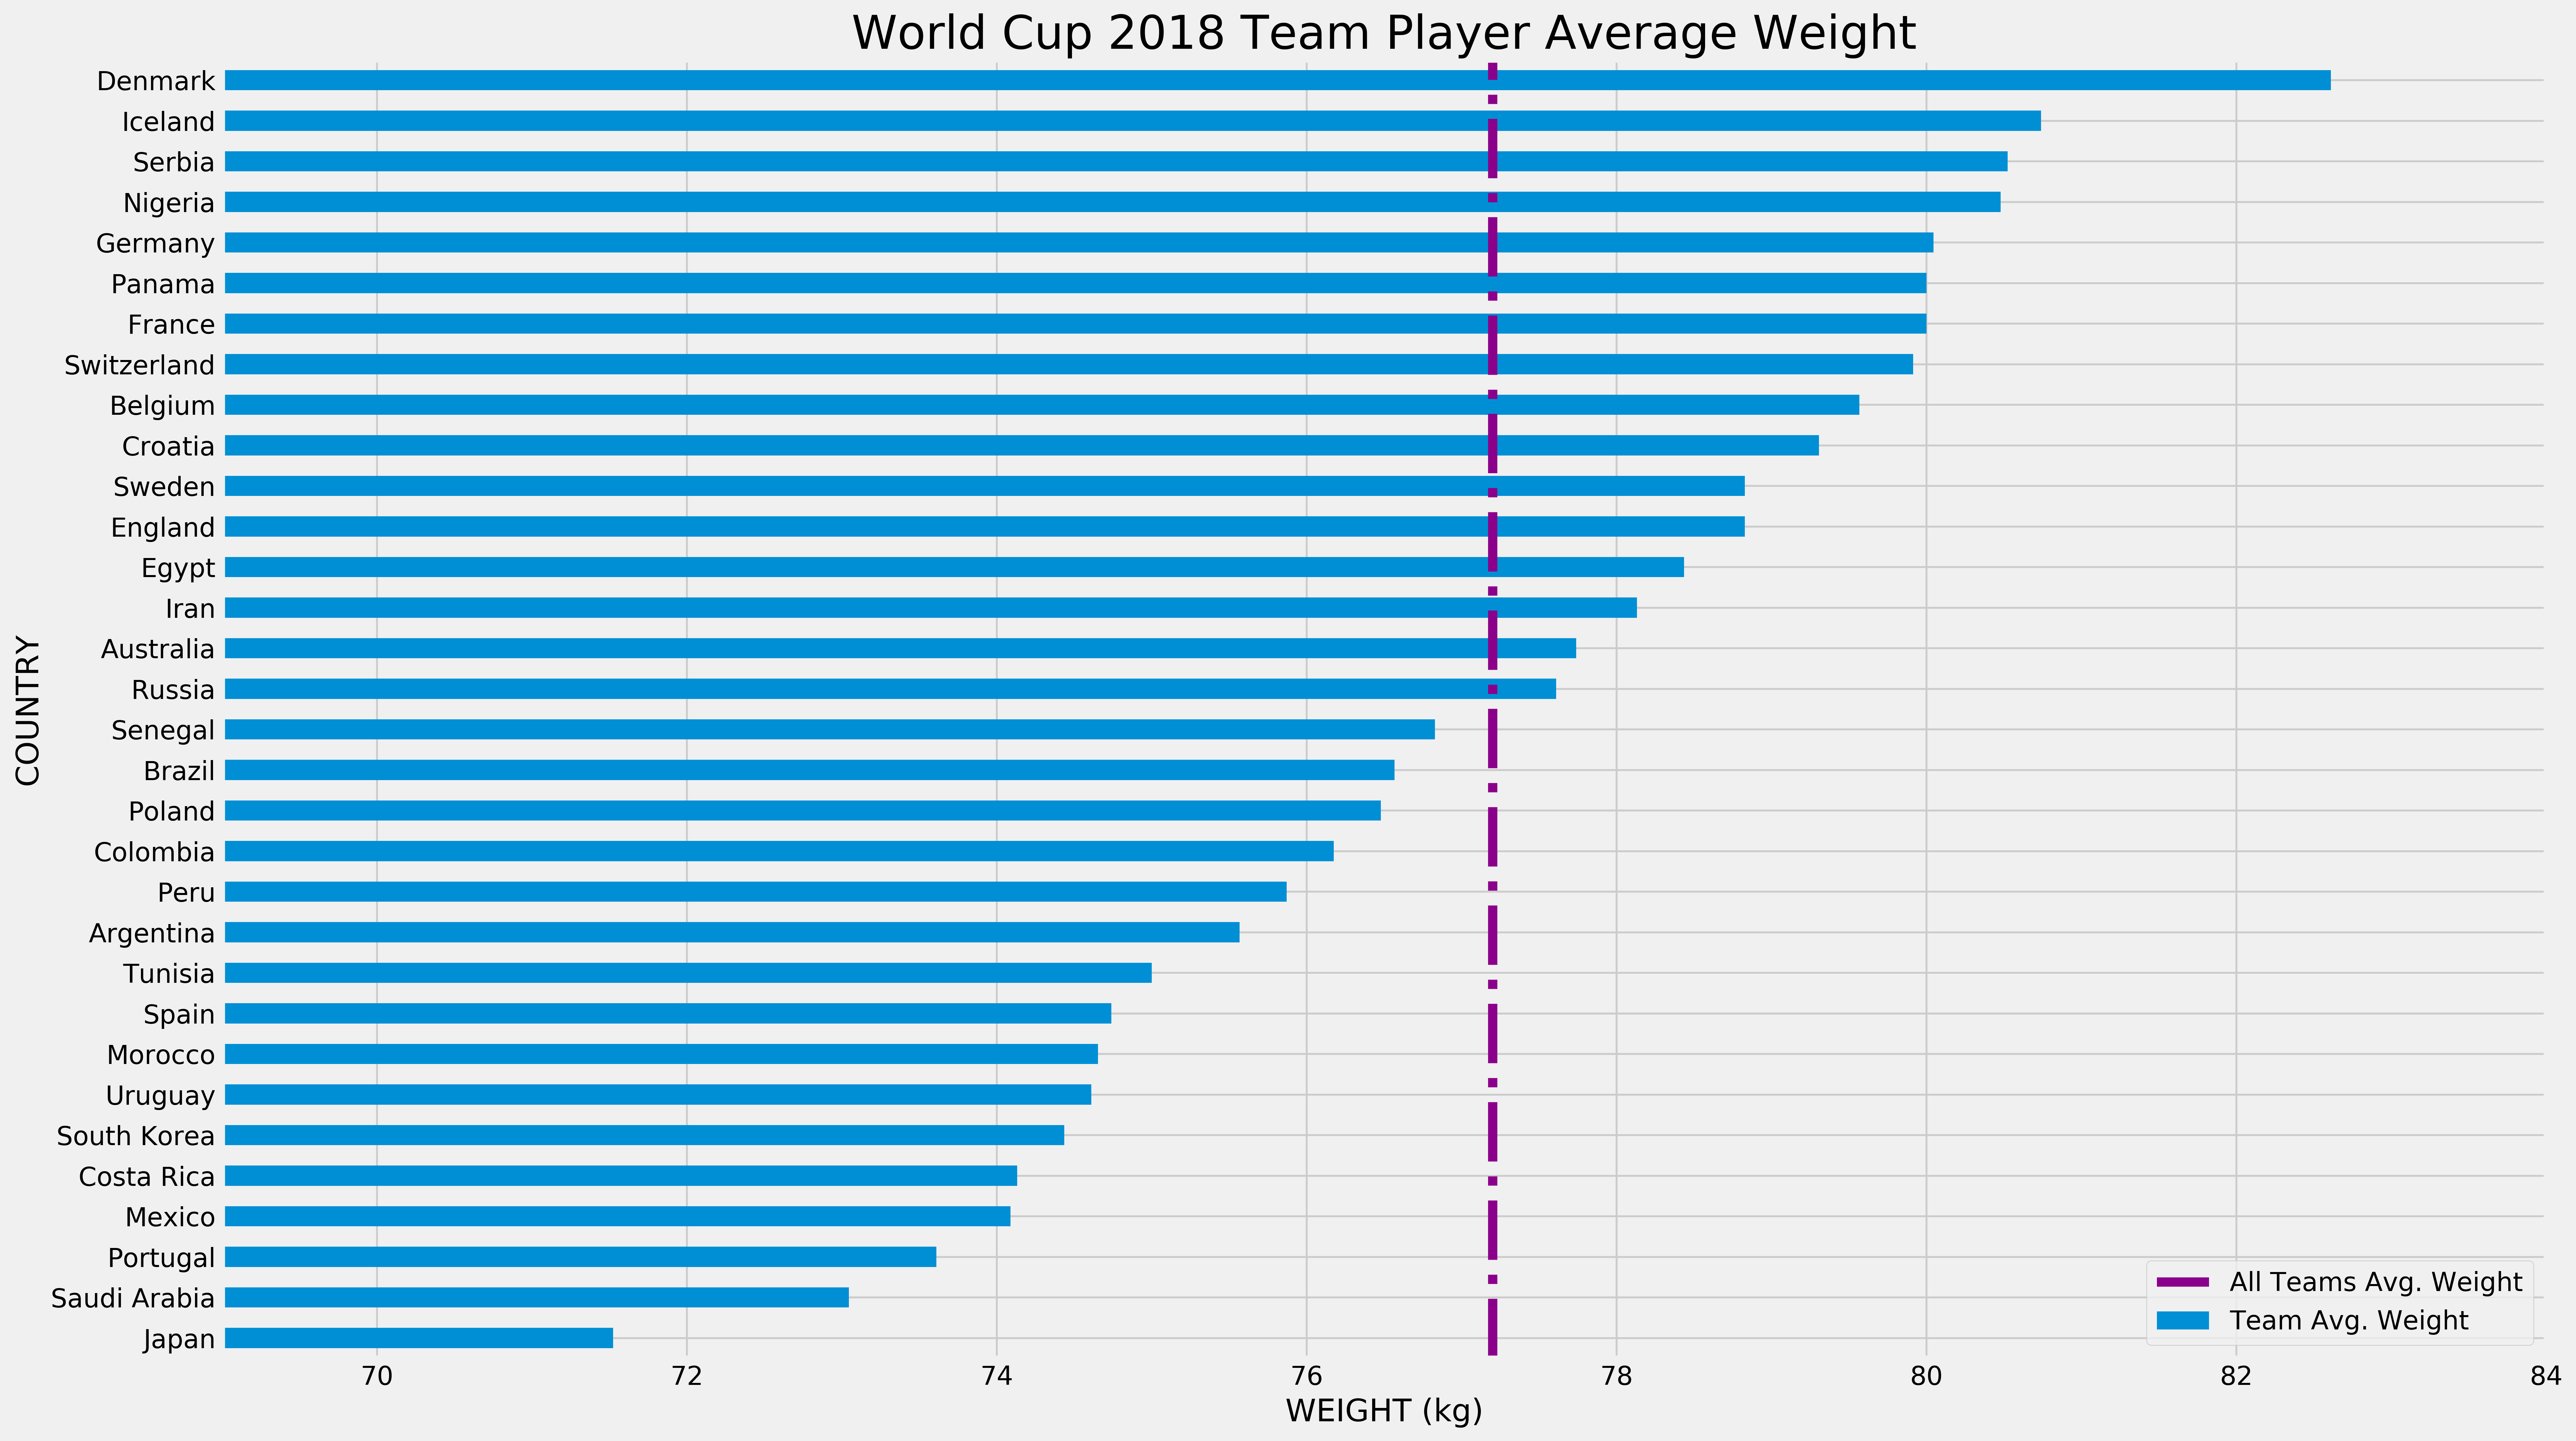

In [23]:
# Average Weight for Teams
plt.rcParams["figure.dpi"] = 400
plt.style.use('fivethirtyeight')
g1.sort_values(by="Weight", inplace=True)

ax = g1[["Weight"]].plot(figsize = (20, 12),kind="barh")
ax.set_xlabel("WEIGHT (kg)")
ax.set_ylabel("COUNTRY")
ax.set_xlim(69,84)
plt.title("World Cup 2018 Team Player Average Weight", fontsize=25)
plt.axvline(77.2,c="darkmagenta",linestyle="dashdot", linewidth=5)  #Average for ALL Players
plt.legend(["All Teams Avg. Weight","Team Avg. Weight"], loc=0)
plt.savefig("Avg_Weight.png",orientation='landscape',format="png",dpi=100)

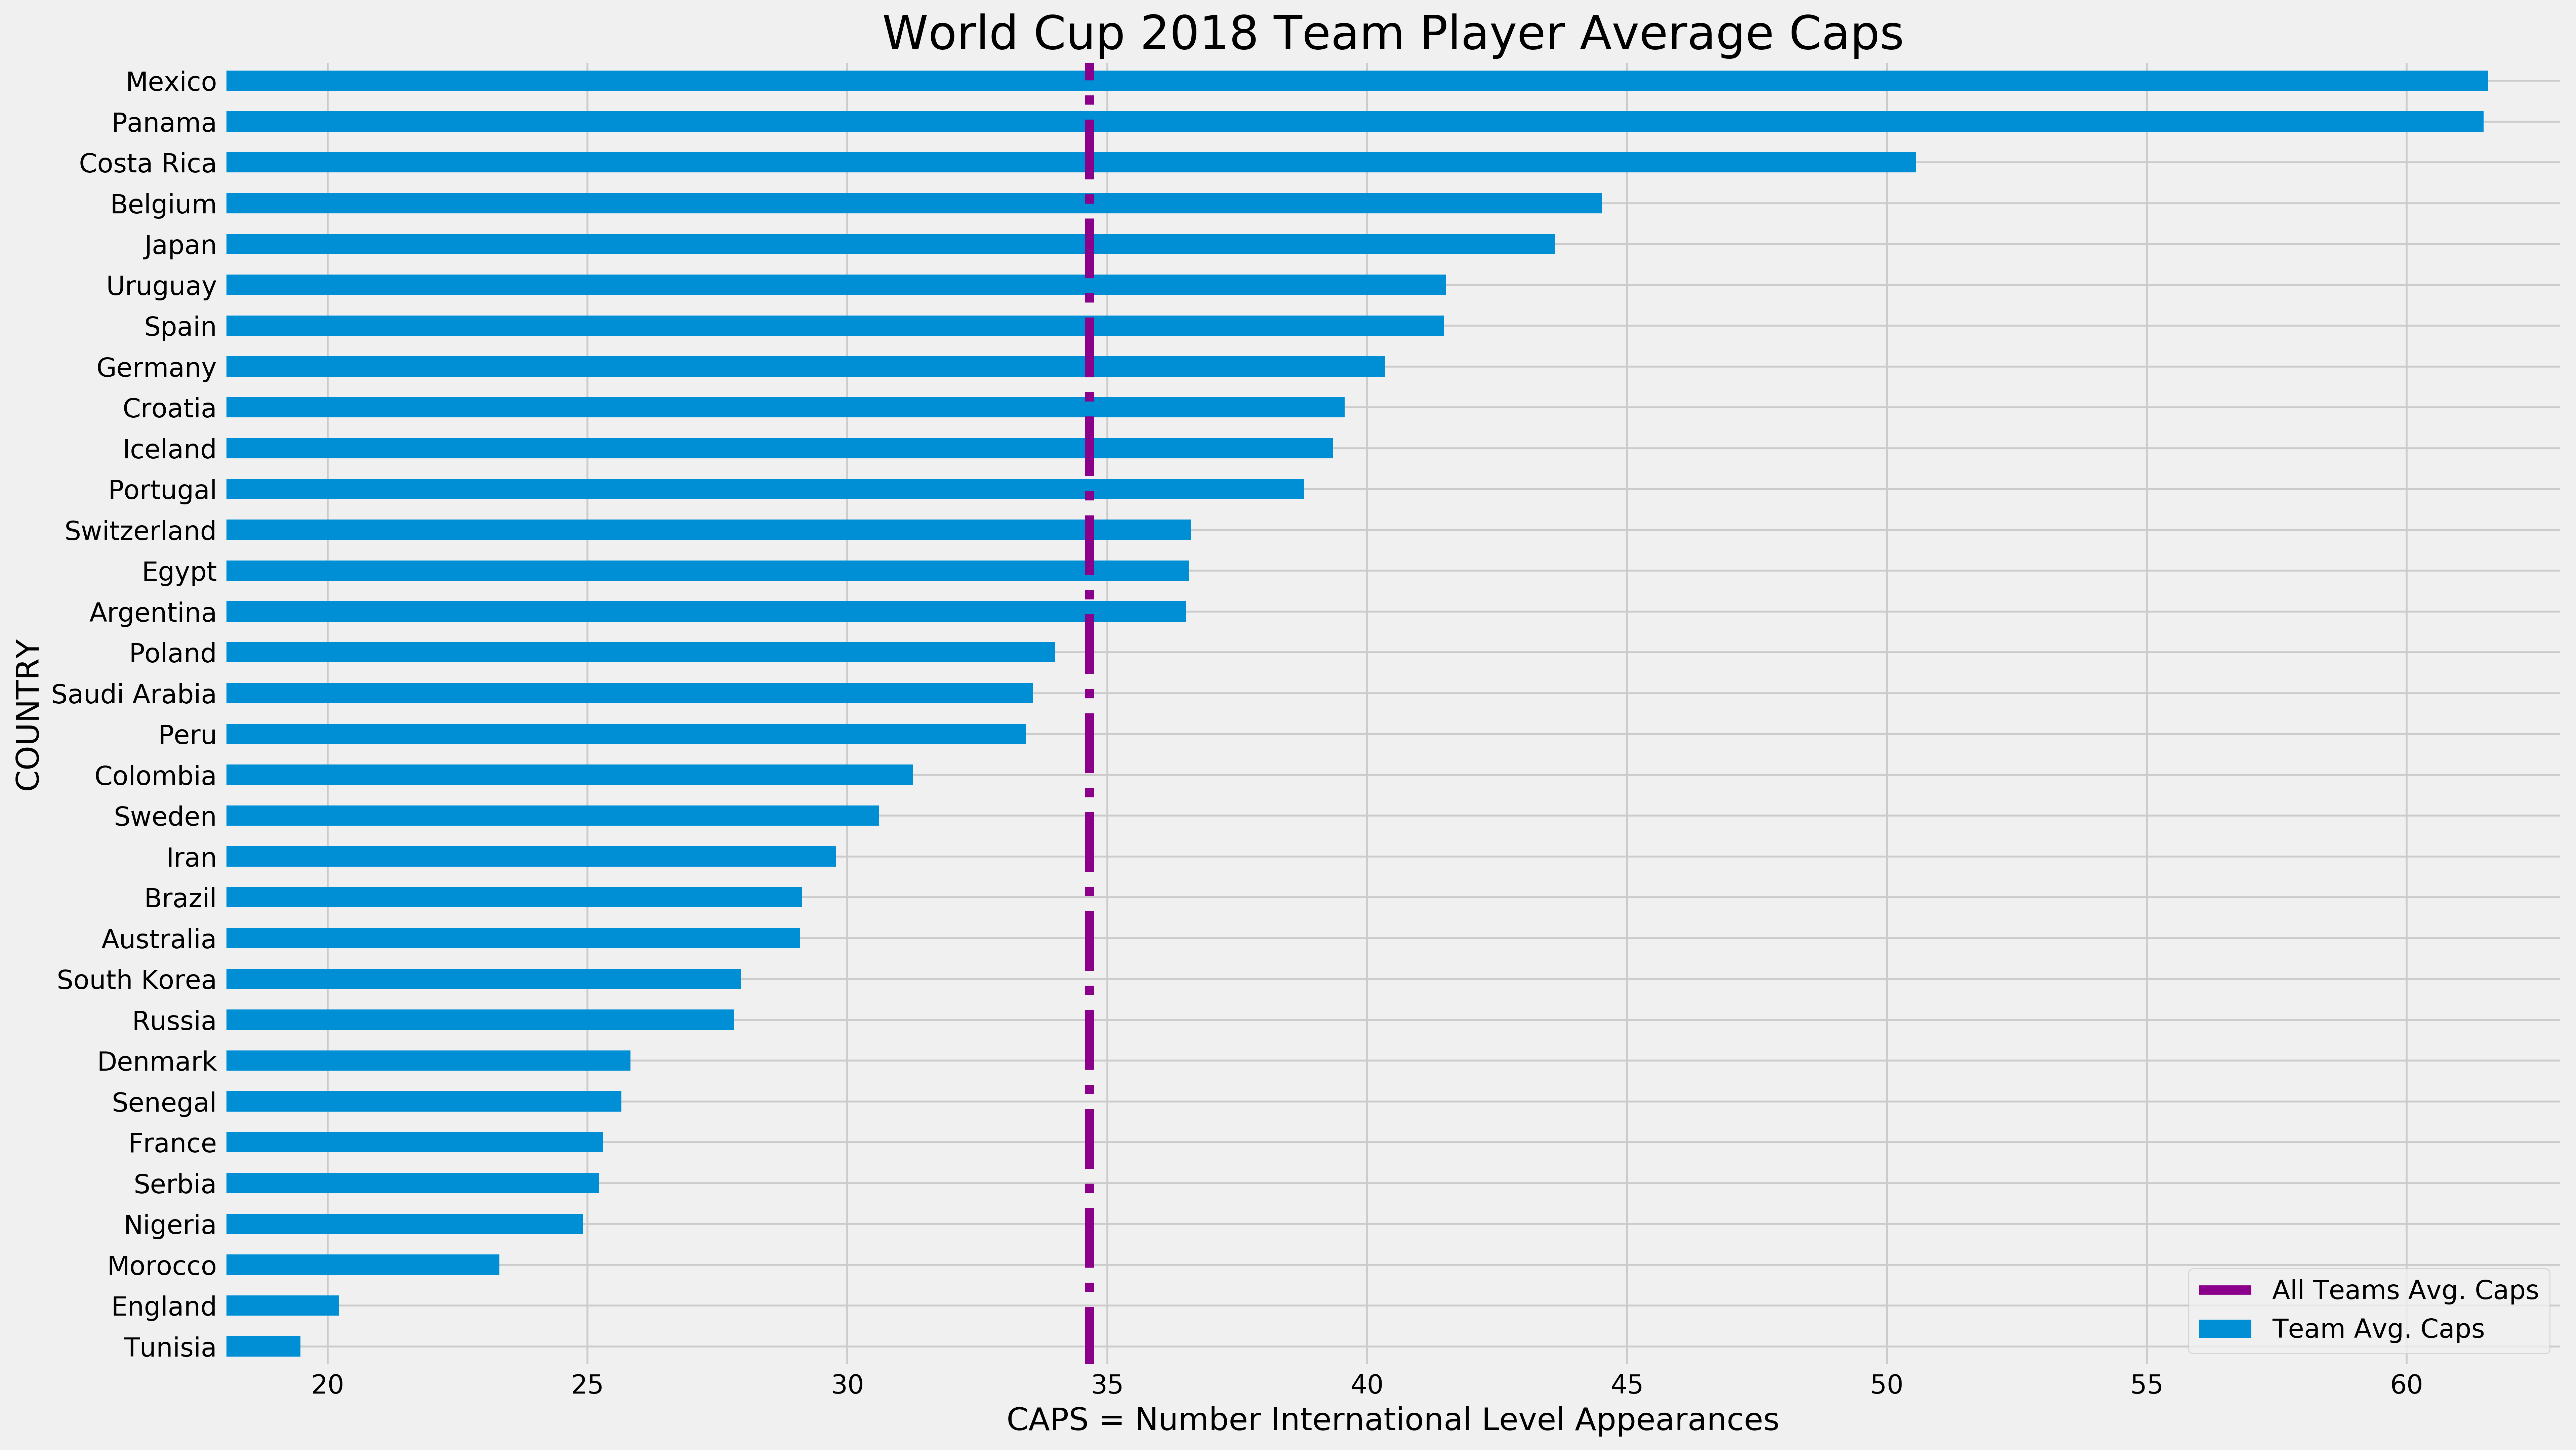

In [24]:
# Average Caps for Teams
plt.rcParams["figure.dpi"] = 400
plt.style.use('fivethirtyeight')
g1.sort_values(by="Caps", inplace=True)

ax = g1[["Caps"]].plot(figsize = (20, 12),kind="barh")
ax.set_xlabel("CAPS = Number International Level Appearances")
ax.set_ylabel("COUNTRY")
ax.set_xlim(18,63)
plt.title("World Cup 2018 Team Player Average Caps", fontsize=25)

plt.axvline(34.66,c="darkmagenta",linestyle="dashdot", linewidth=5)  #Average for ALL Players
plt.legend(["All Teams Avg. Caps","Team Avg. Caps"], loc=0)
plt.savefig("Avg_Caps.png",orientation='landscape',format="png",dpi=100)

## Graph Regressions
-  Define Column variables to be called in plotting code
-  Construct regression plots for Goal time data vs. columns added to data frame above

In [25]:
combined_times_means = merged_df["combined_avg"]
team_wins = merged_df["wins"]
team_points = merged_df["points"]
differential = merged_df["goal_differential"]
points_allowed = merged_df["goals_against"]
team_losses = merged_df["losses"]

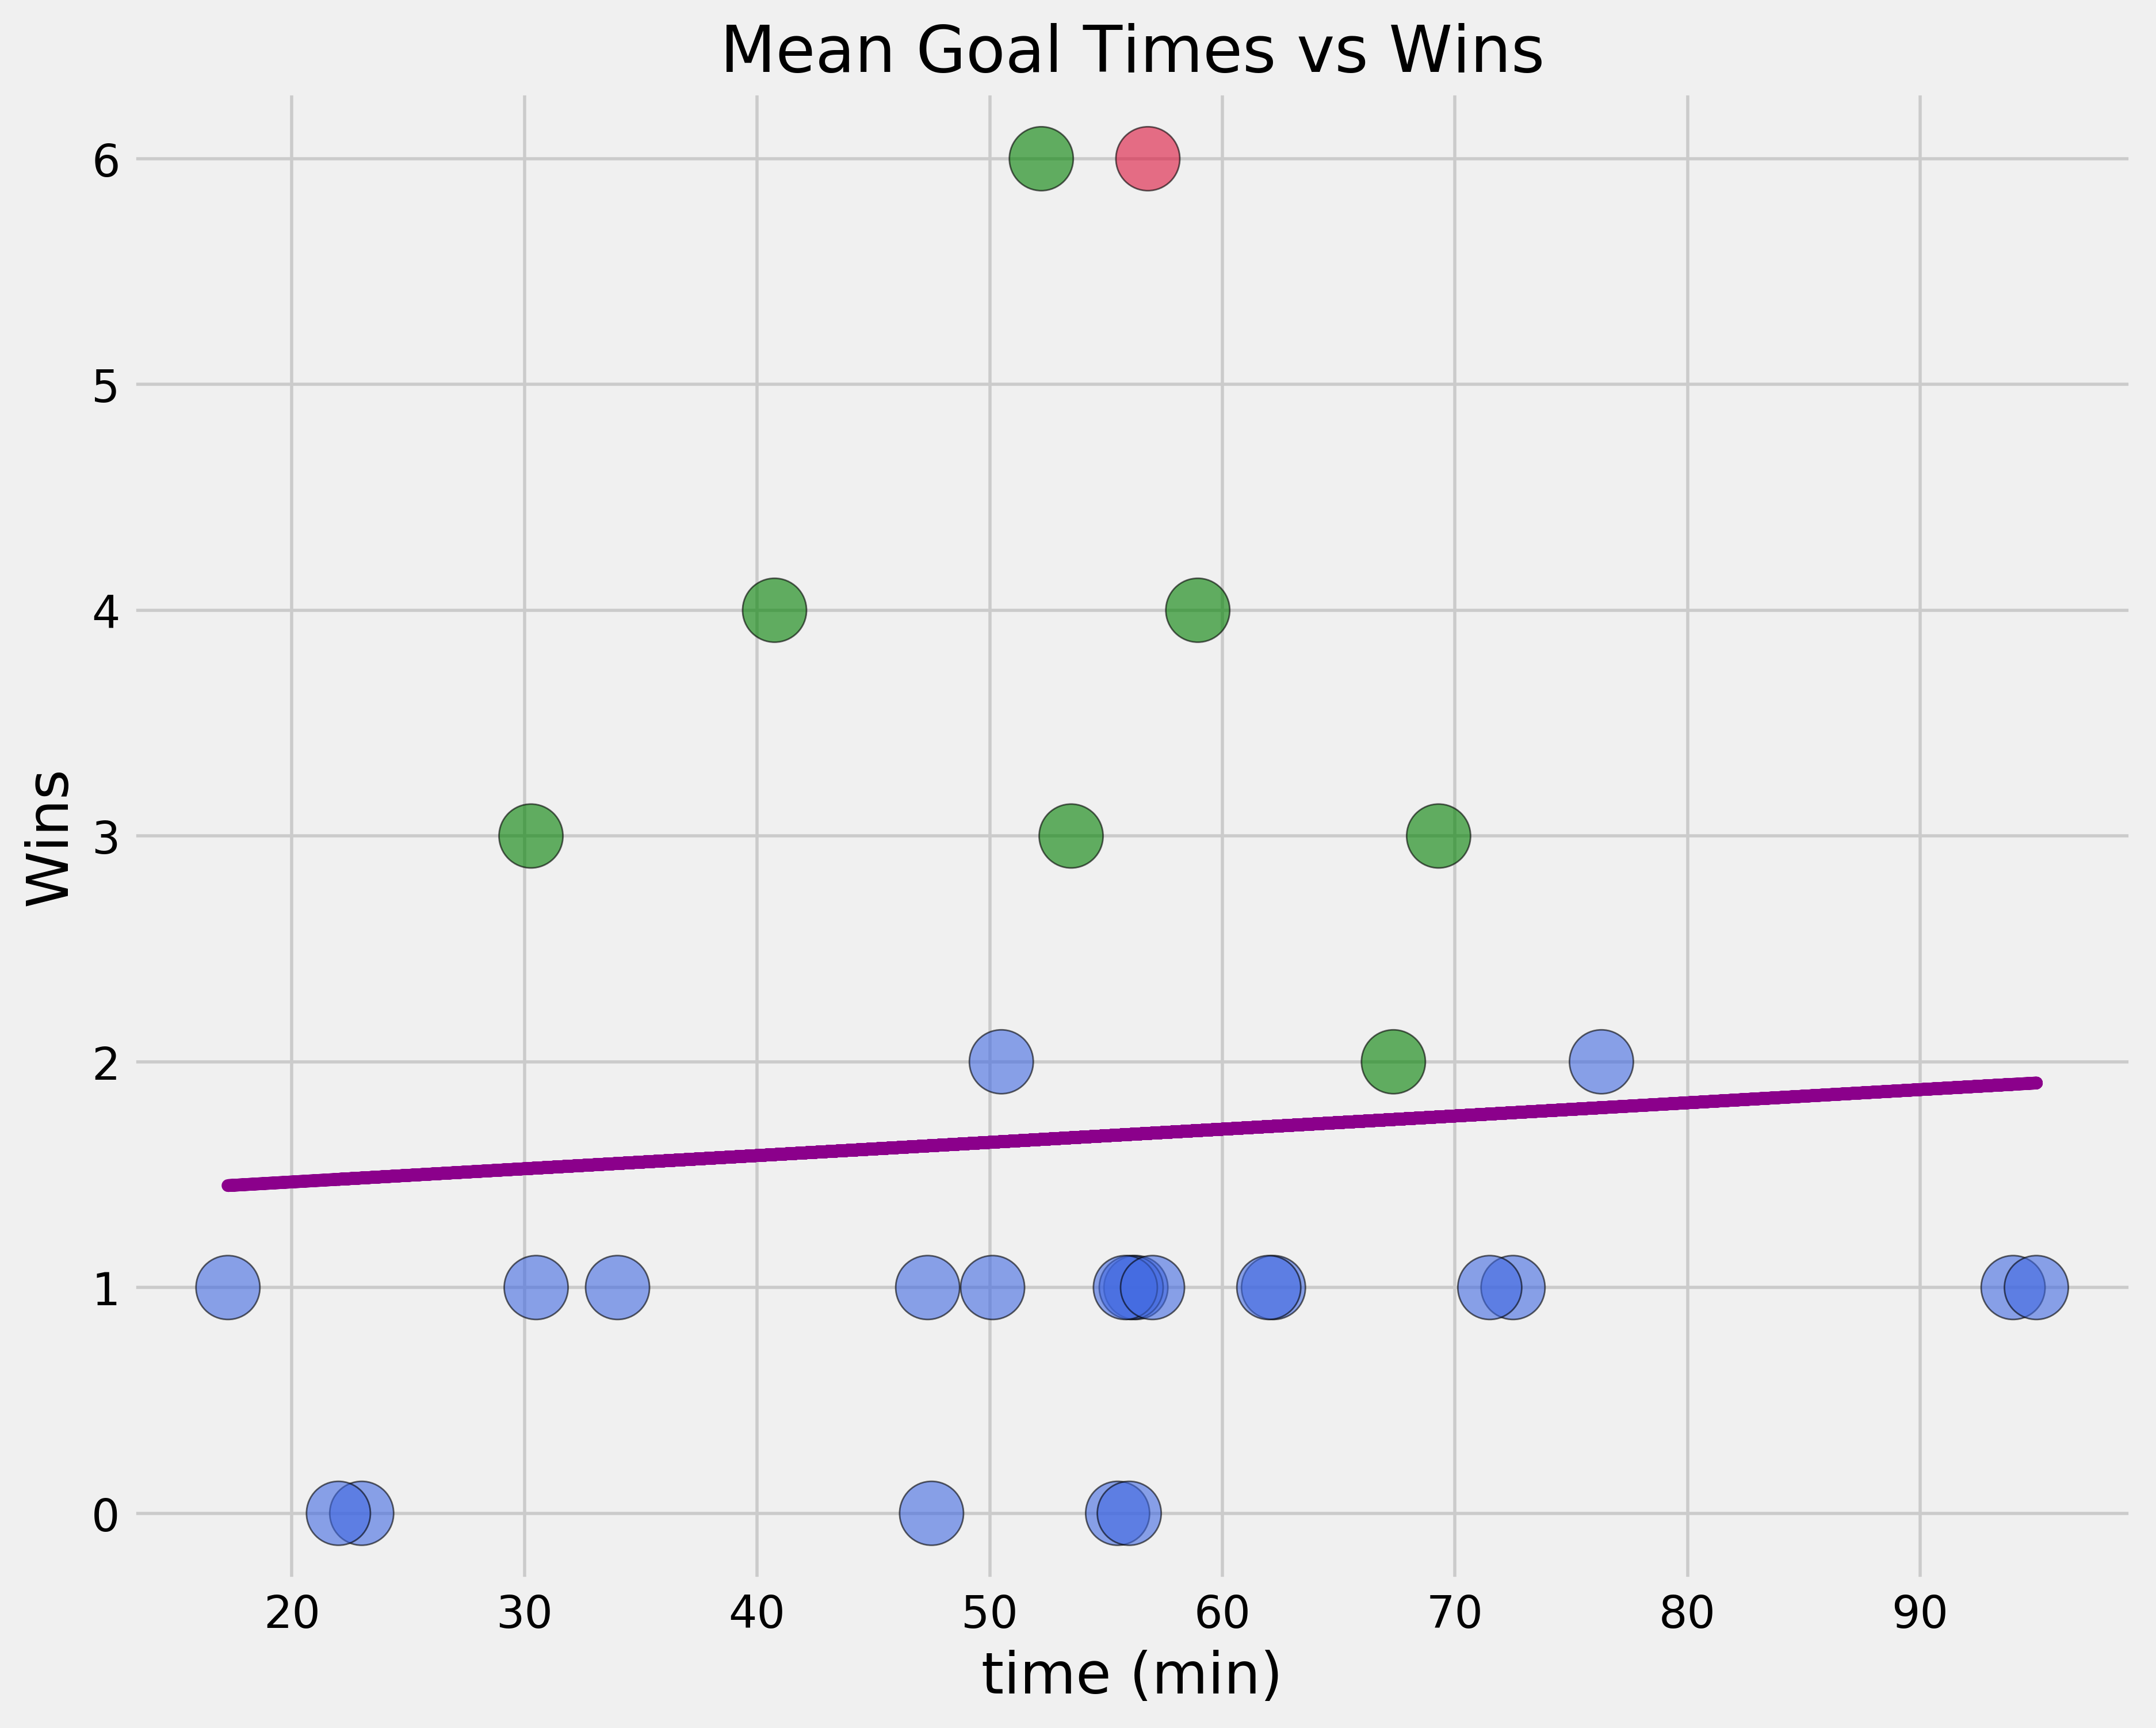

R-value: 0.06821426764078714, P-value: 0.7202185945329516)


In [26]:
# get plt style
plt.style.use('fivethirtyeight')
merged_df['colors'] = 'royalblue'
fig, ax = plt.subplots(figsize = (10,8))


slope, intercept, r_value, p_value, std_err = scipy.linregress(merged_df["combined_avg"], team_wins)

z = np.polyfit(merged_df["combined_avg"], team_wins, 1)
p = np.poly1d(z)

# set title and axis labels
plt.ylabel("Wins", fontsize=18)
plt.xlabel("time (min)", fontsize=18)
plt.title("Time Data vs. Wins", color = "black")

# isolate France and make crimson
merged_df.loc[merged_df["country"]=="France",'colors'] = 'crimson'

# color remaining top 8 teams green
merged_df.loc[merged_df["country"] == "Russia", 'colors'] = "g"
merged_df.loc[merged_df["country"] == "Croatia", 'colors'] = "g"
merged_df.loc[merged_df["country"] == "Uruguay", 'colors'] = "g"
merged_df.loc[merged_df["country"] == "Sweden", 'colors'] = "g"
merged_df.loc[merged_df["country"] == "England", 'colors'] = "g"
merged_df.loc[merged_df["country"] == "Brazil", 'colors'] = "g"
merged_df.loc[merged_df["country"] == "Belgium", 'colors'] = "g"

# plot line
plt.plot(merged_df["combined_avg"],p(merged_df["combined_avg"]),"darkmagenta")

# plot scatter plot
plt.scatter(merged_df["combined_avg"],team_wins, color = merged_df.colors,
            marker = "o",
            s = 400,
            edgecolors = "black",
            alpha = .6
           )



# set title and axis labels
plt.ylabel("Wins", fontsize=18)
plt.xlabel("time (min)", fontsize=18)
plt.title("Mean Goal Times vs Wins", color = "black")

plt.savefig("Mean Goal Times vs Wins FIFA 2018.png")
plt.show()

# print r and p value
print(f"R-value: {r_value}, P-value: {p_value})")

# plt.savefig("TimeVsWin.jpg",orientation='landscape',format="jpg",dpi=1000)

### Average time of a Goal scored Vs. Number of wins by team
-  **Hypothesis**: A team that typically scores earlier may benefit from a demoralizing effect on the opposing team of having to play from behind. 
-  **Results**: The graph suggests that there is no significant relationship between the average time that a particular team scores a goal and their number of wins over the course of the tournament.
-  **Conclusion**: Players competing at this high level are mentally resilient enough to be able to play from behind with no significant negative effect on their performance, meaning that the outcome remains skill based regardless of any “mind games” employed intentionally or otherwise.

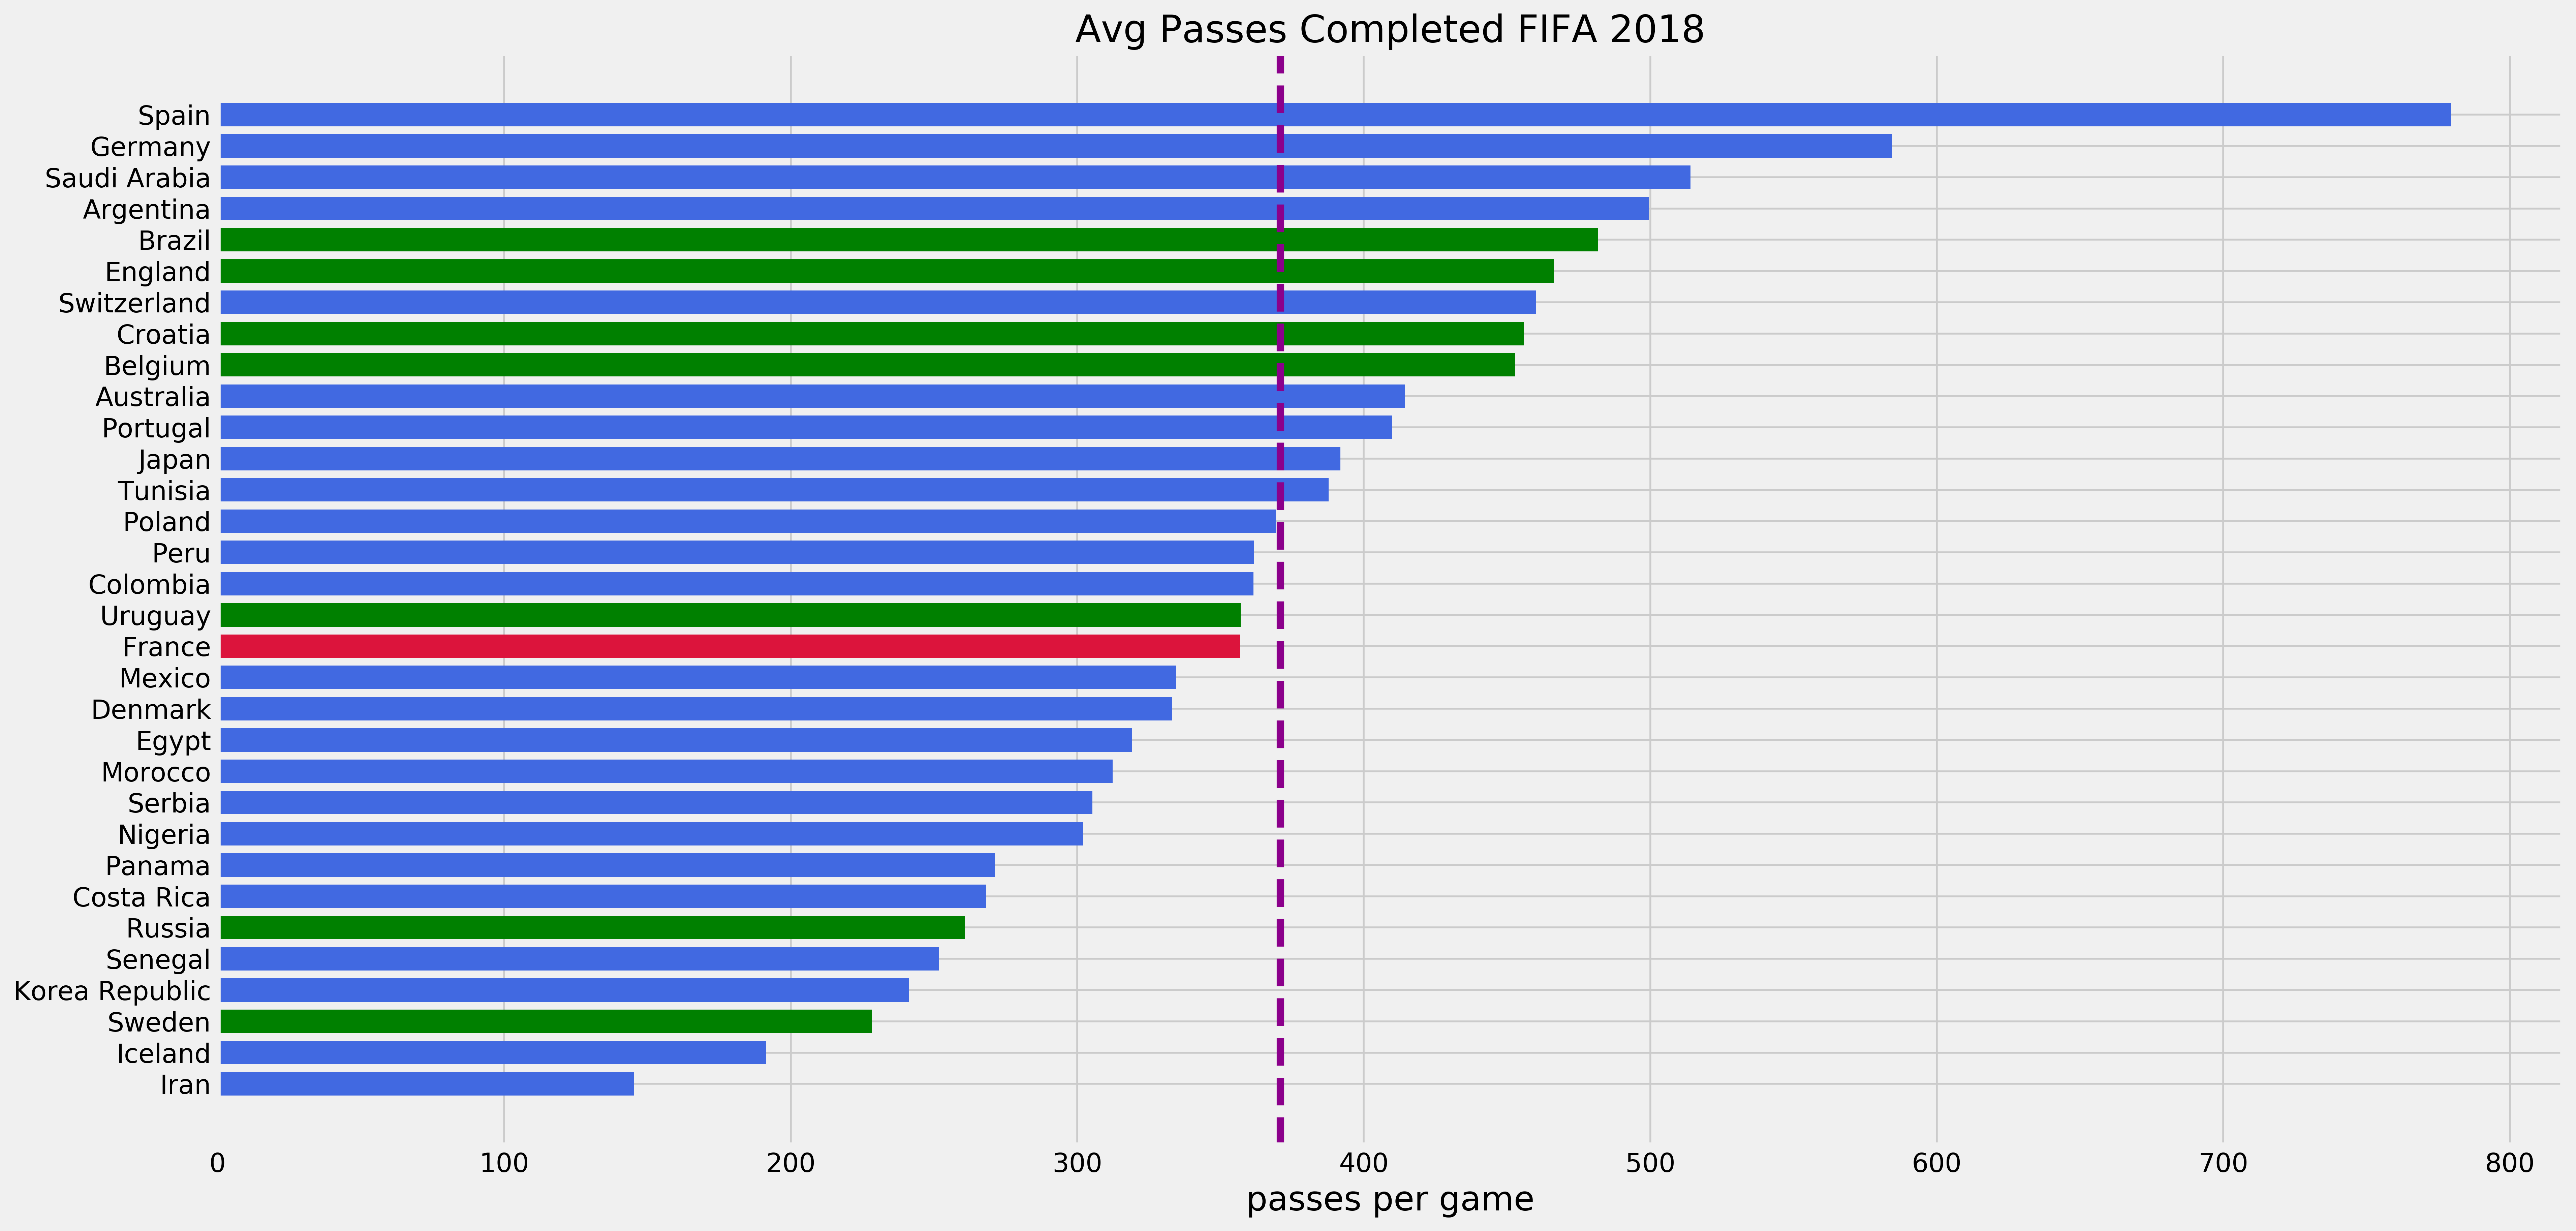

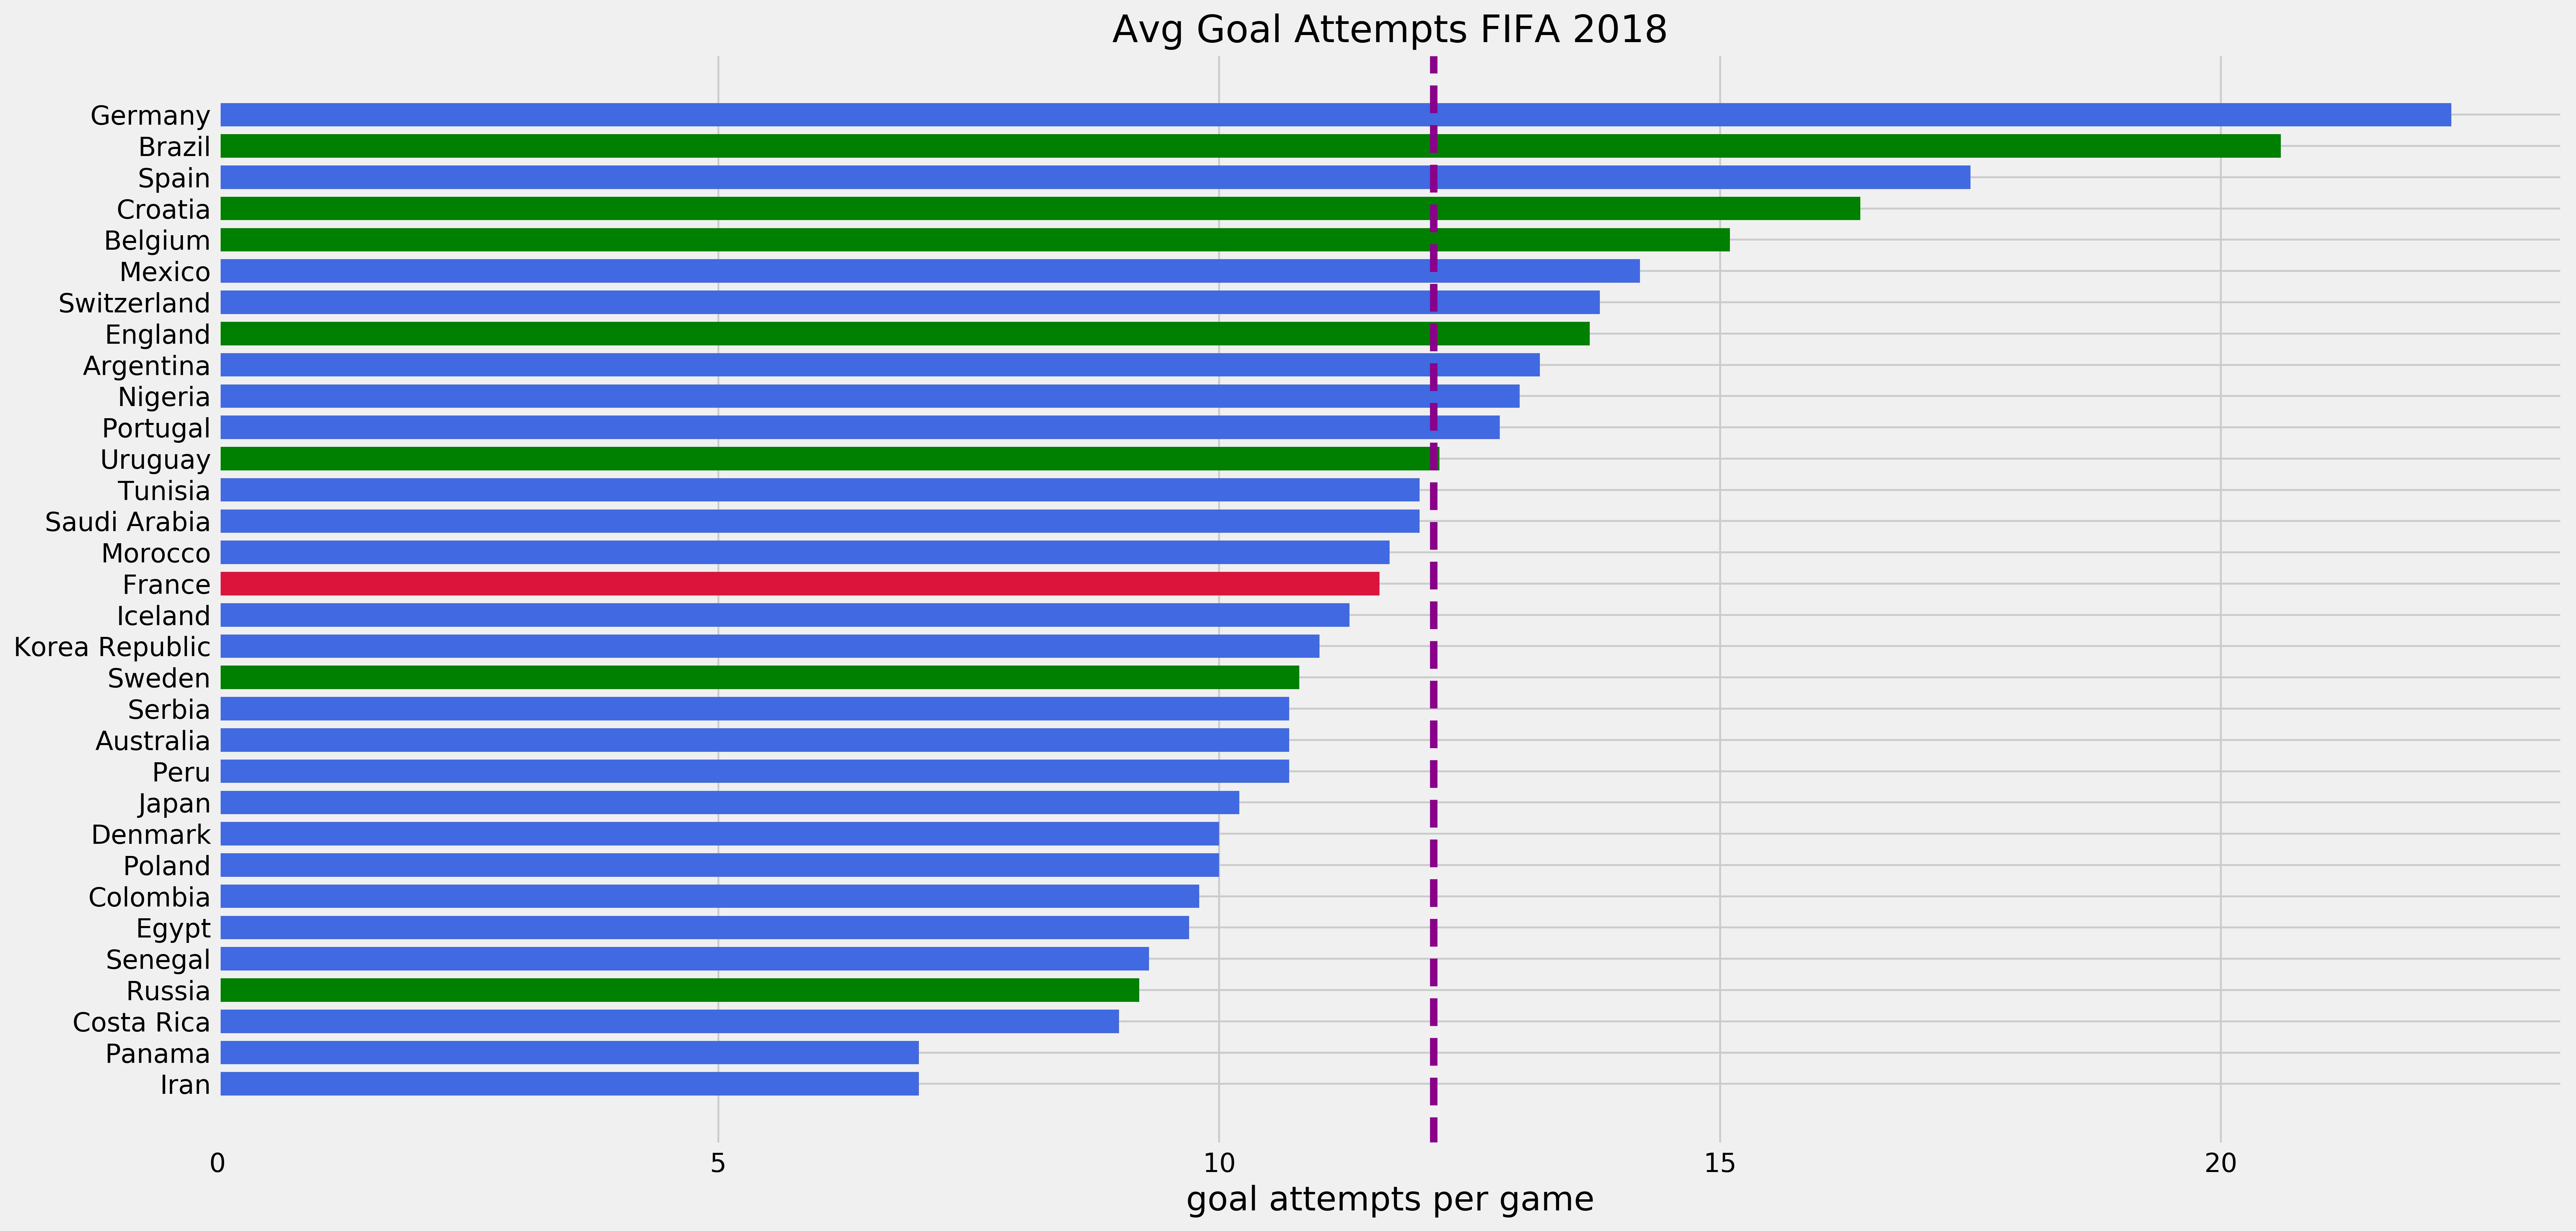

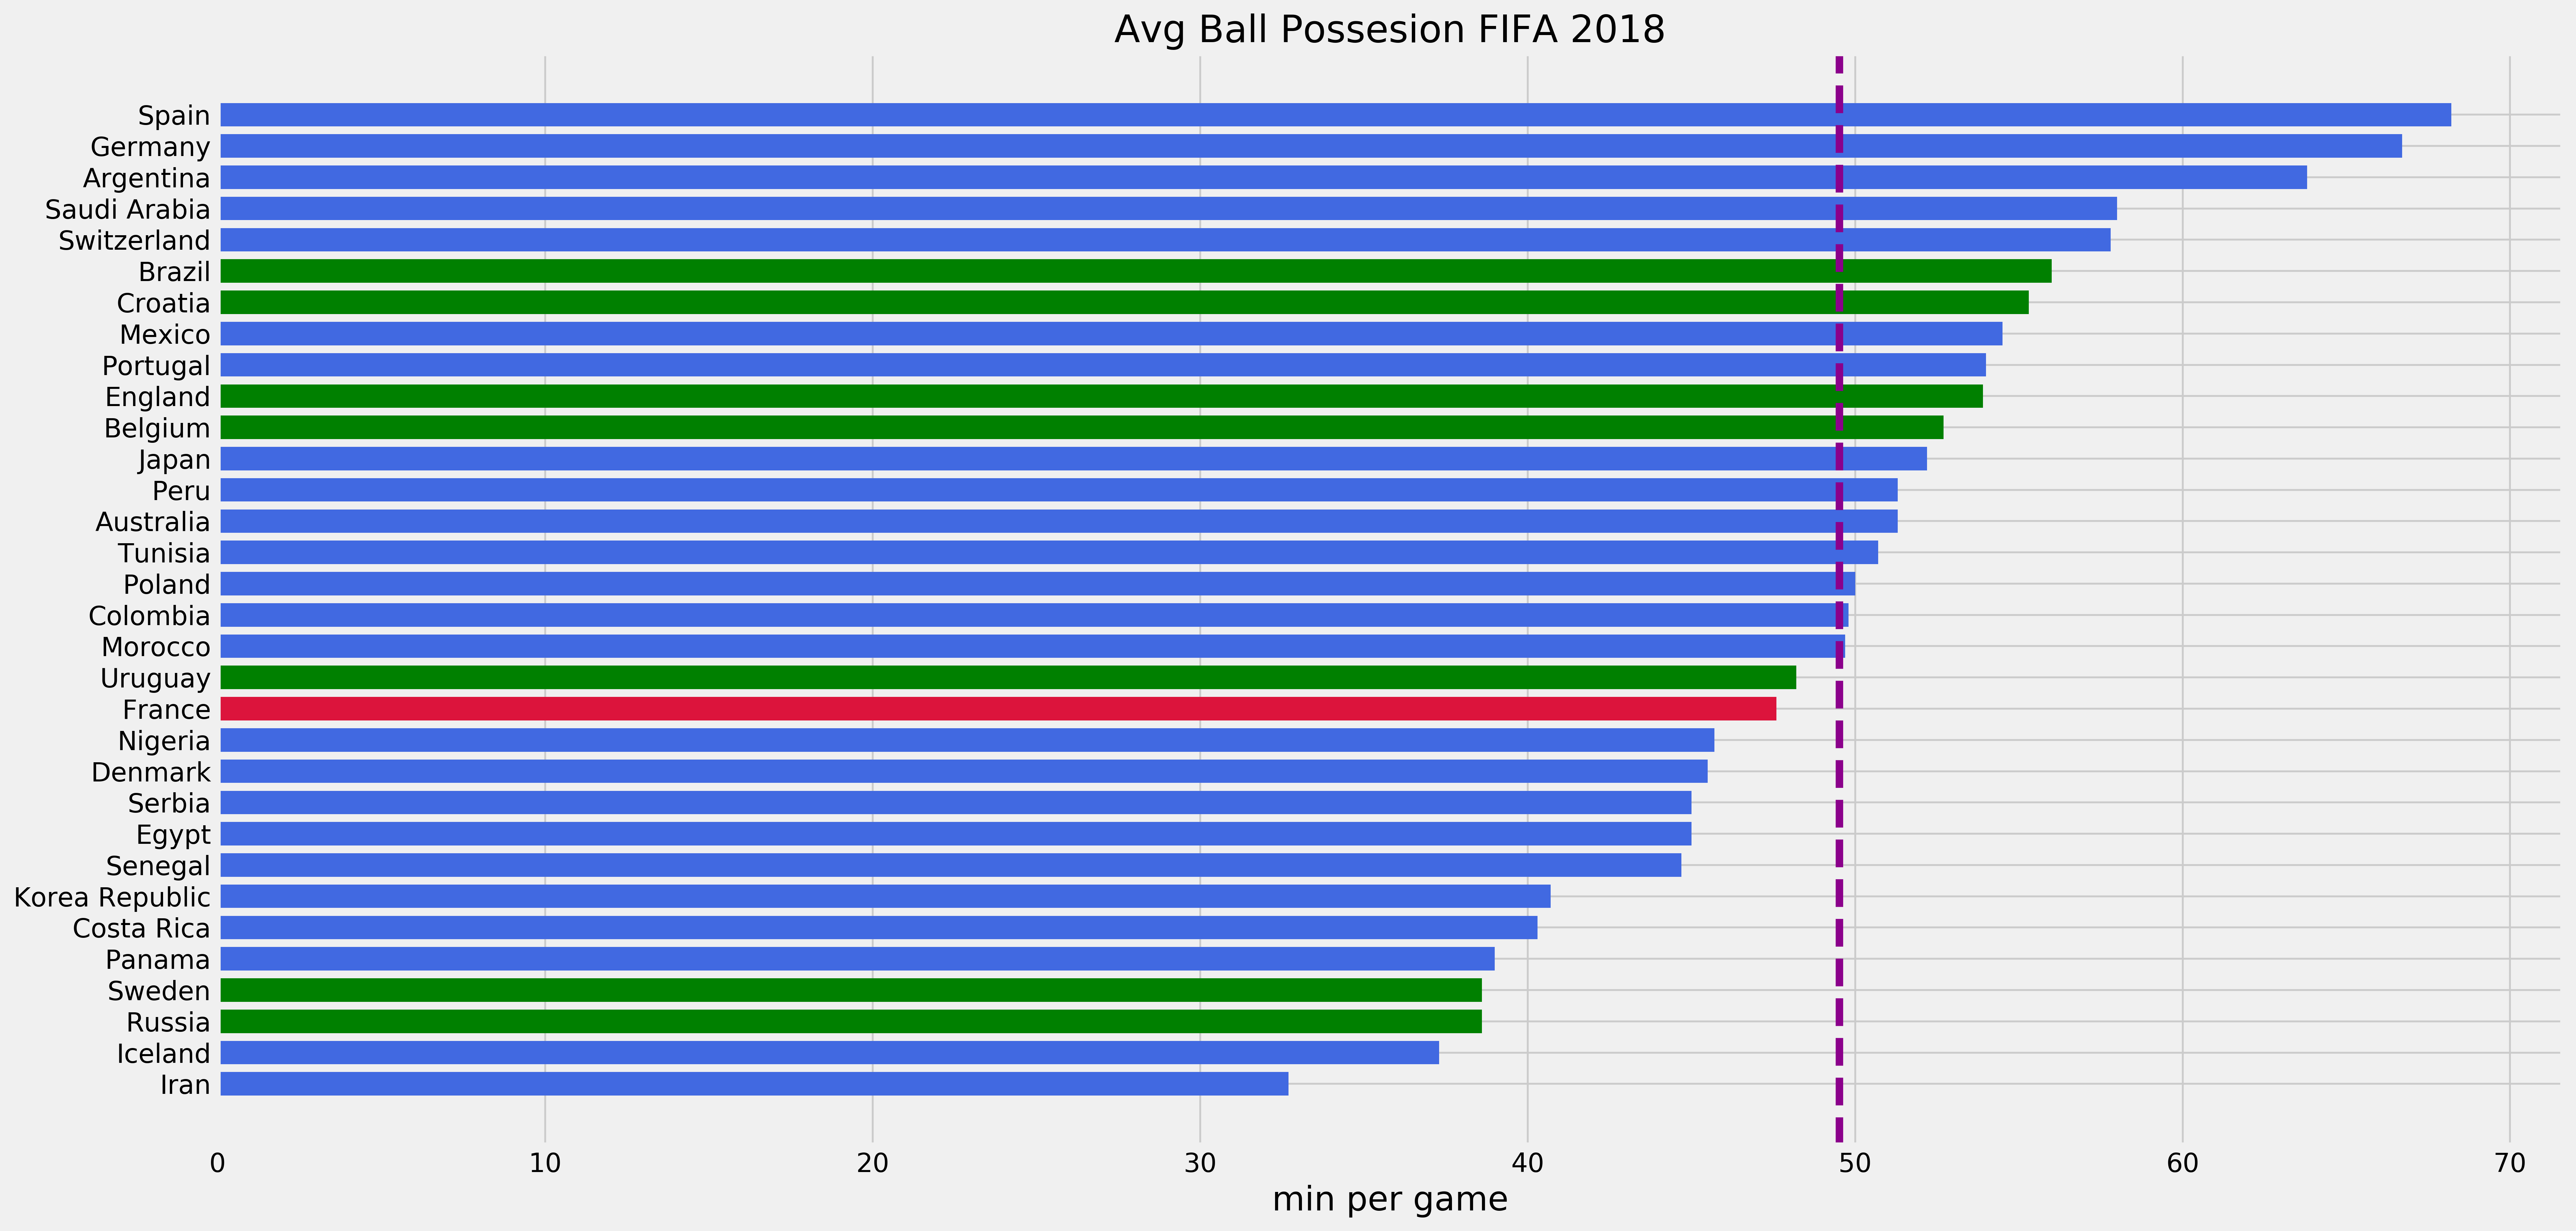

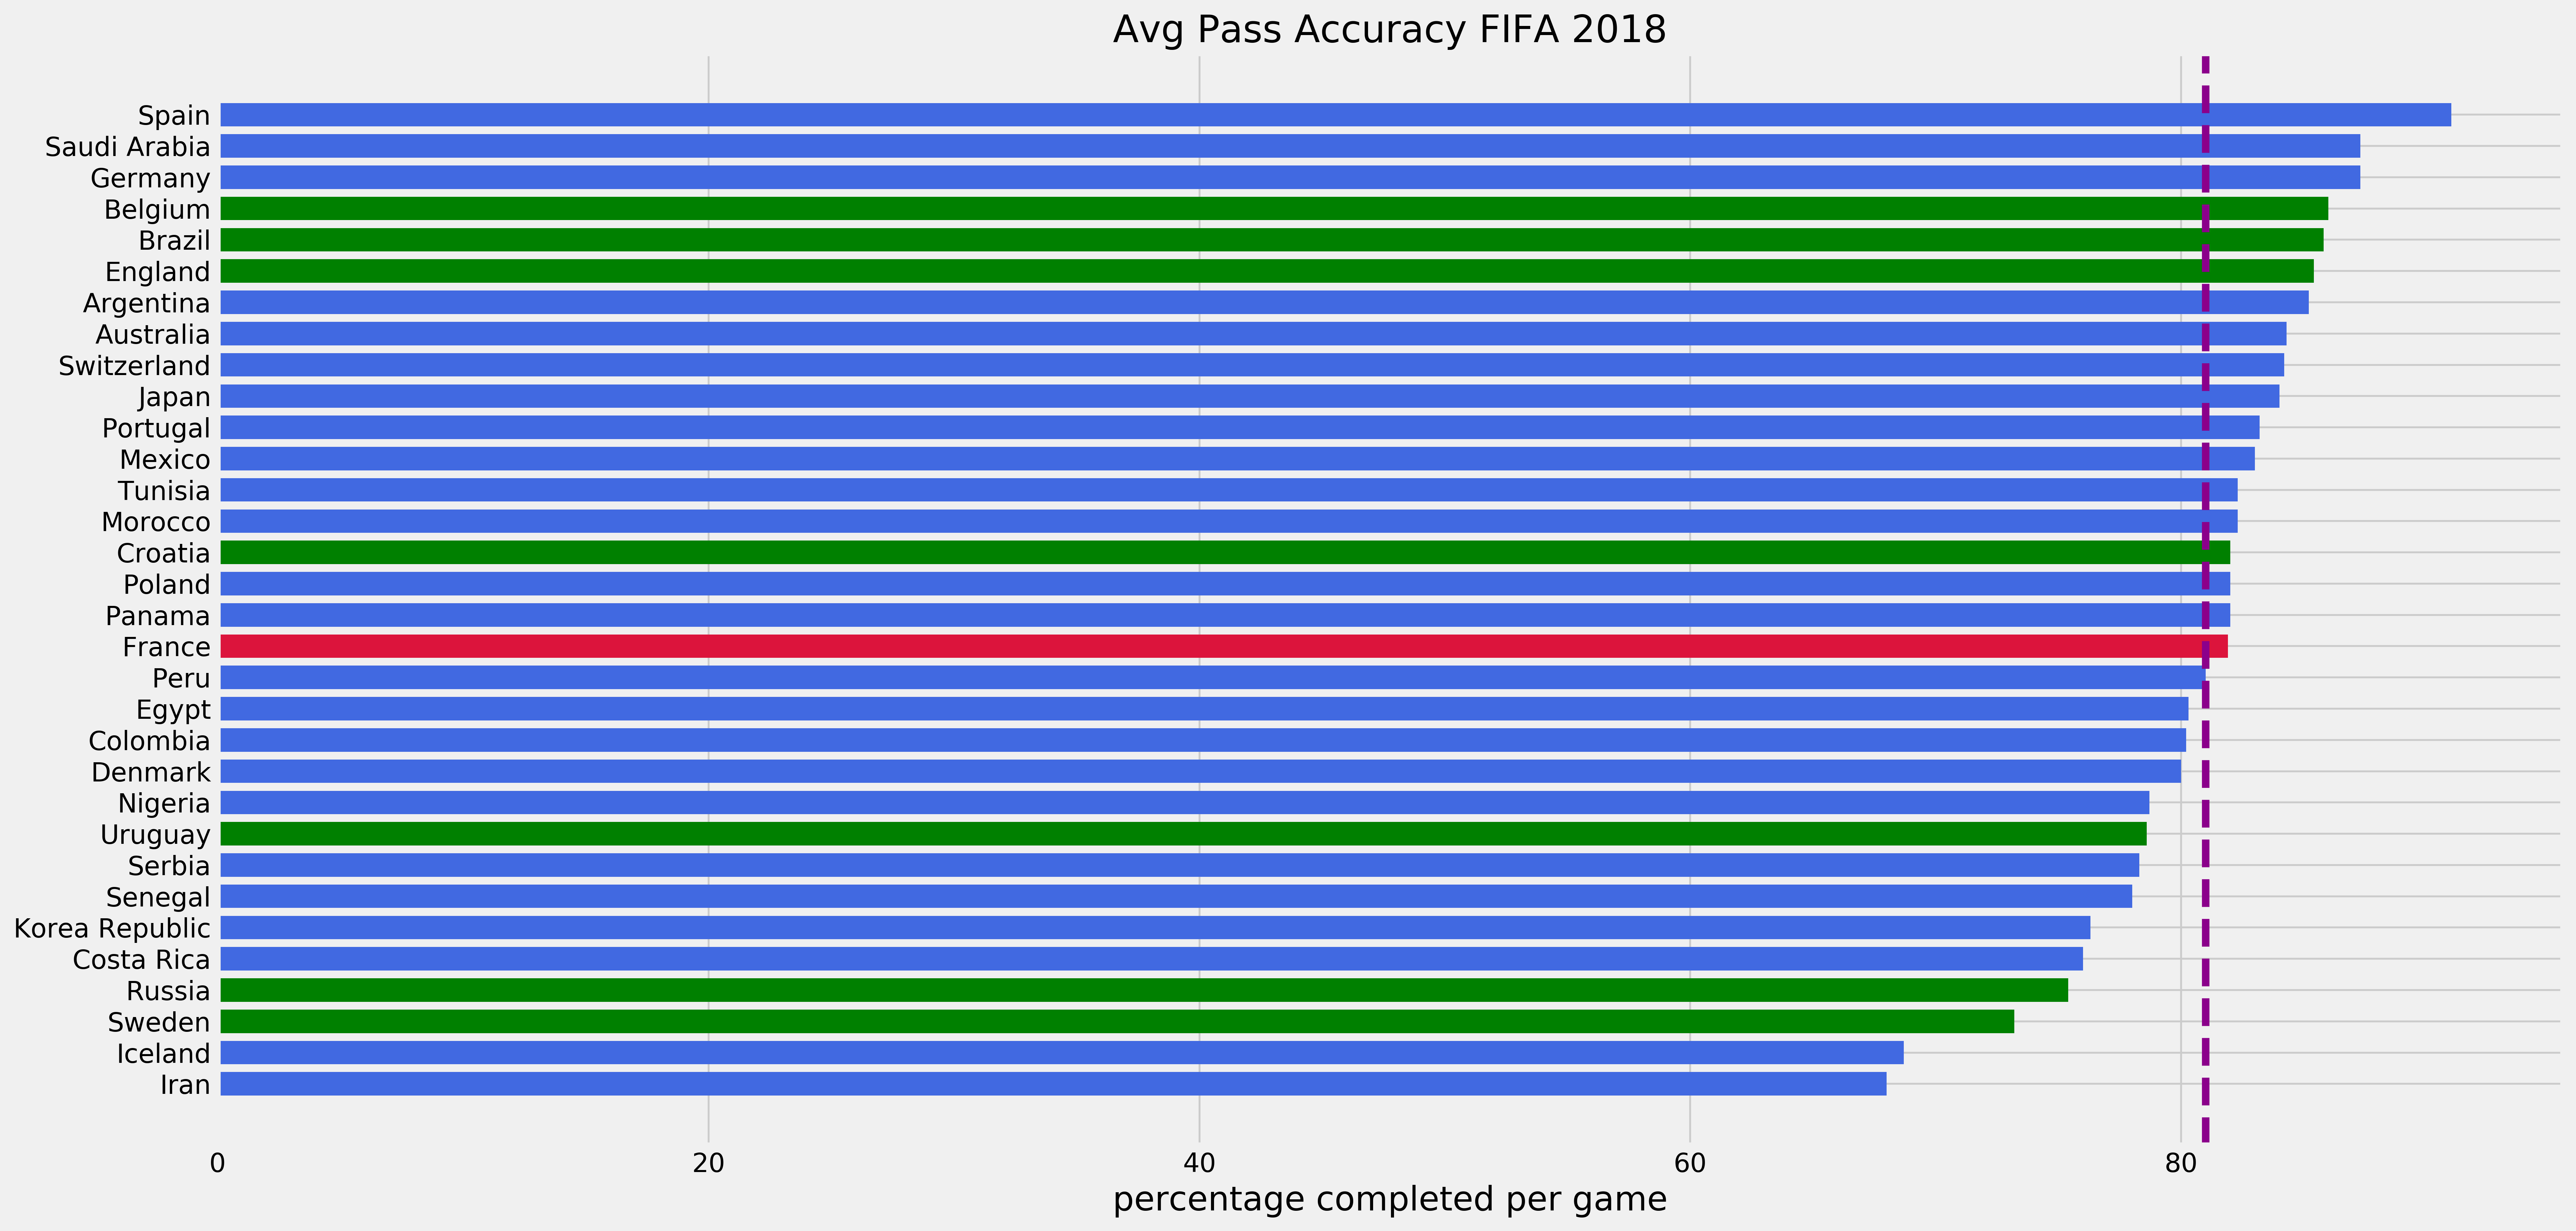

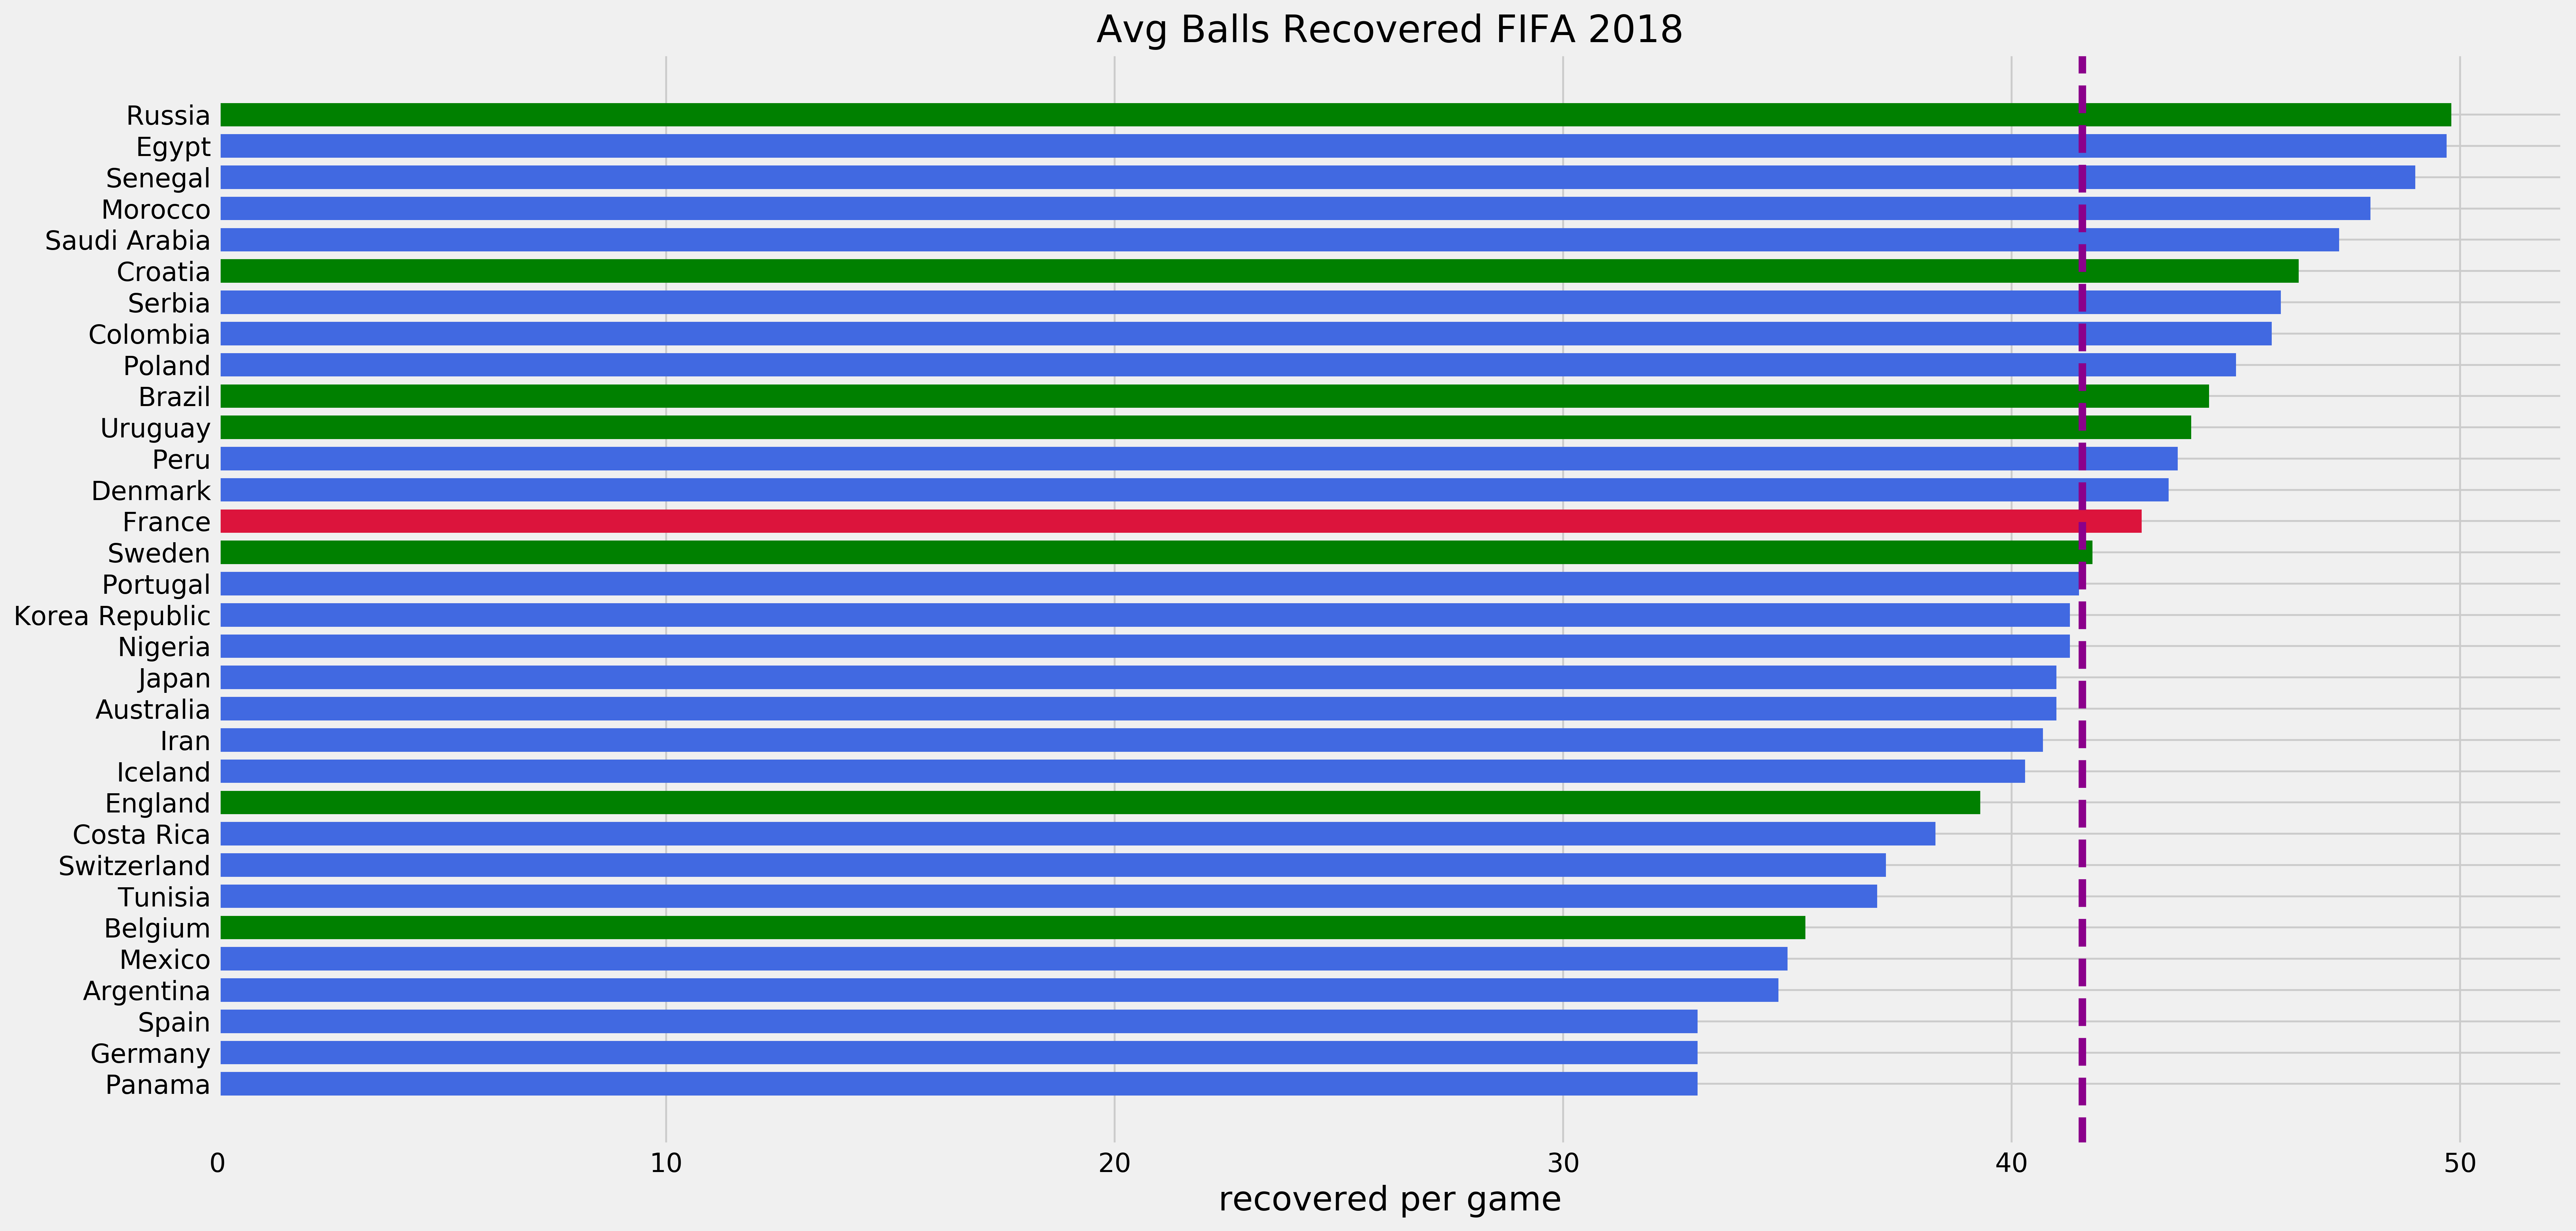

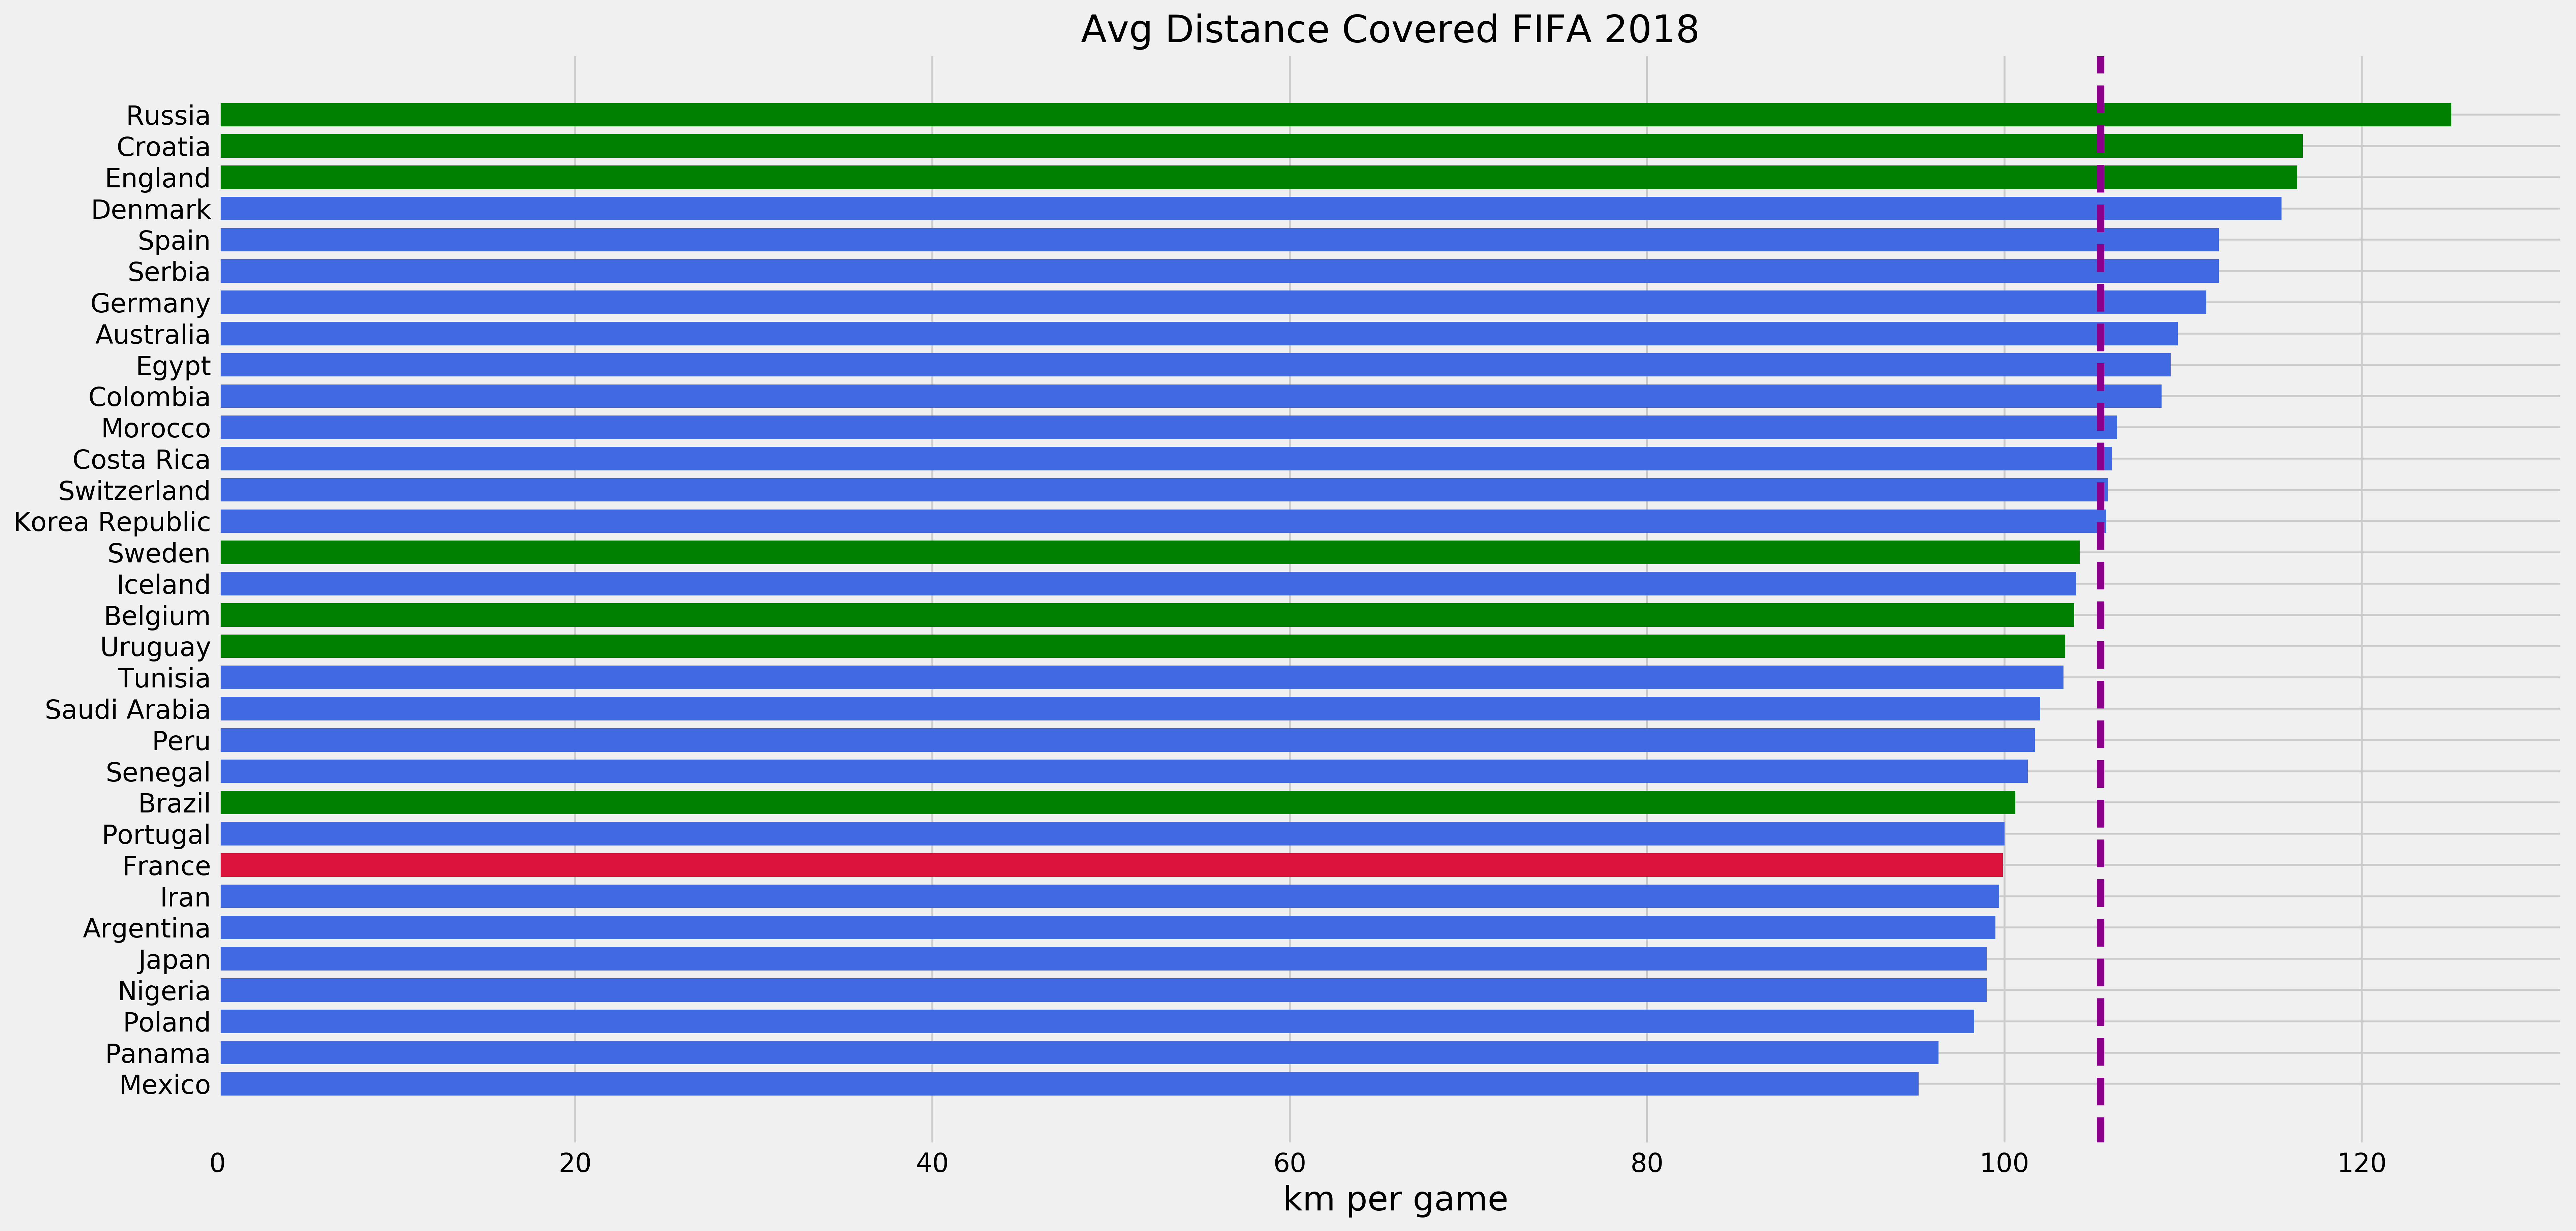

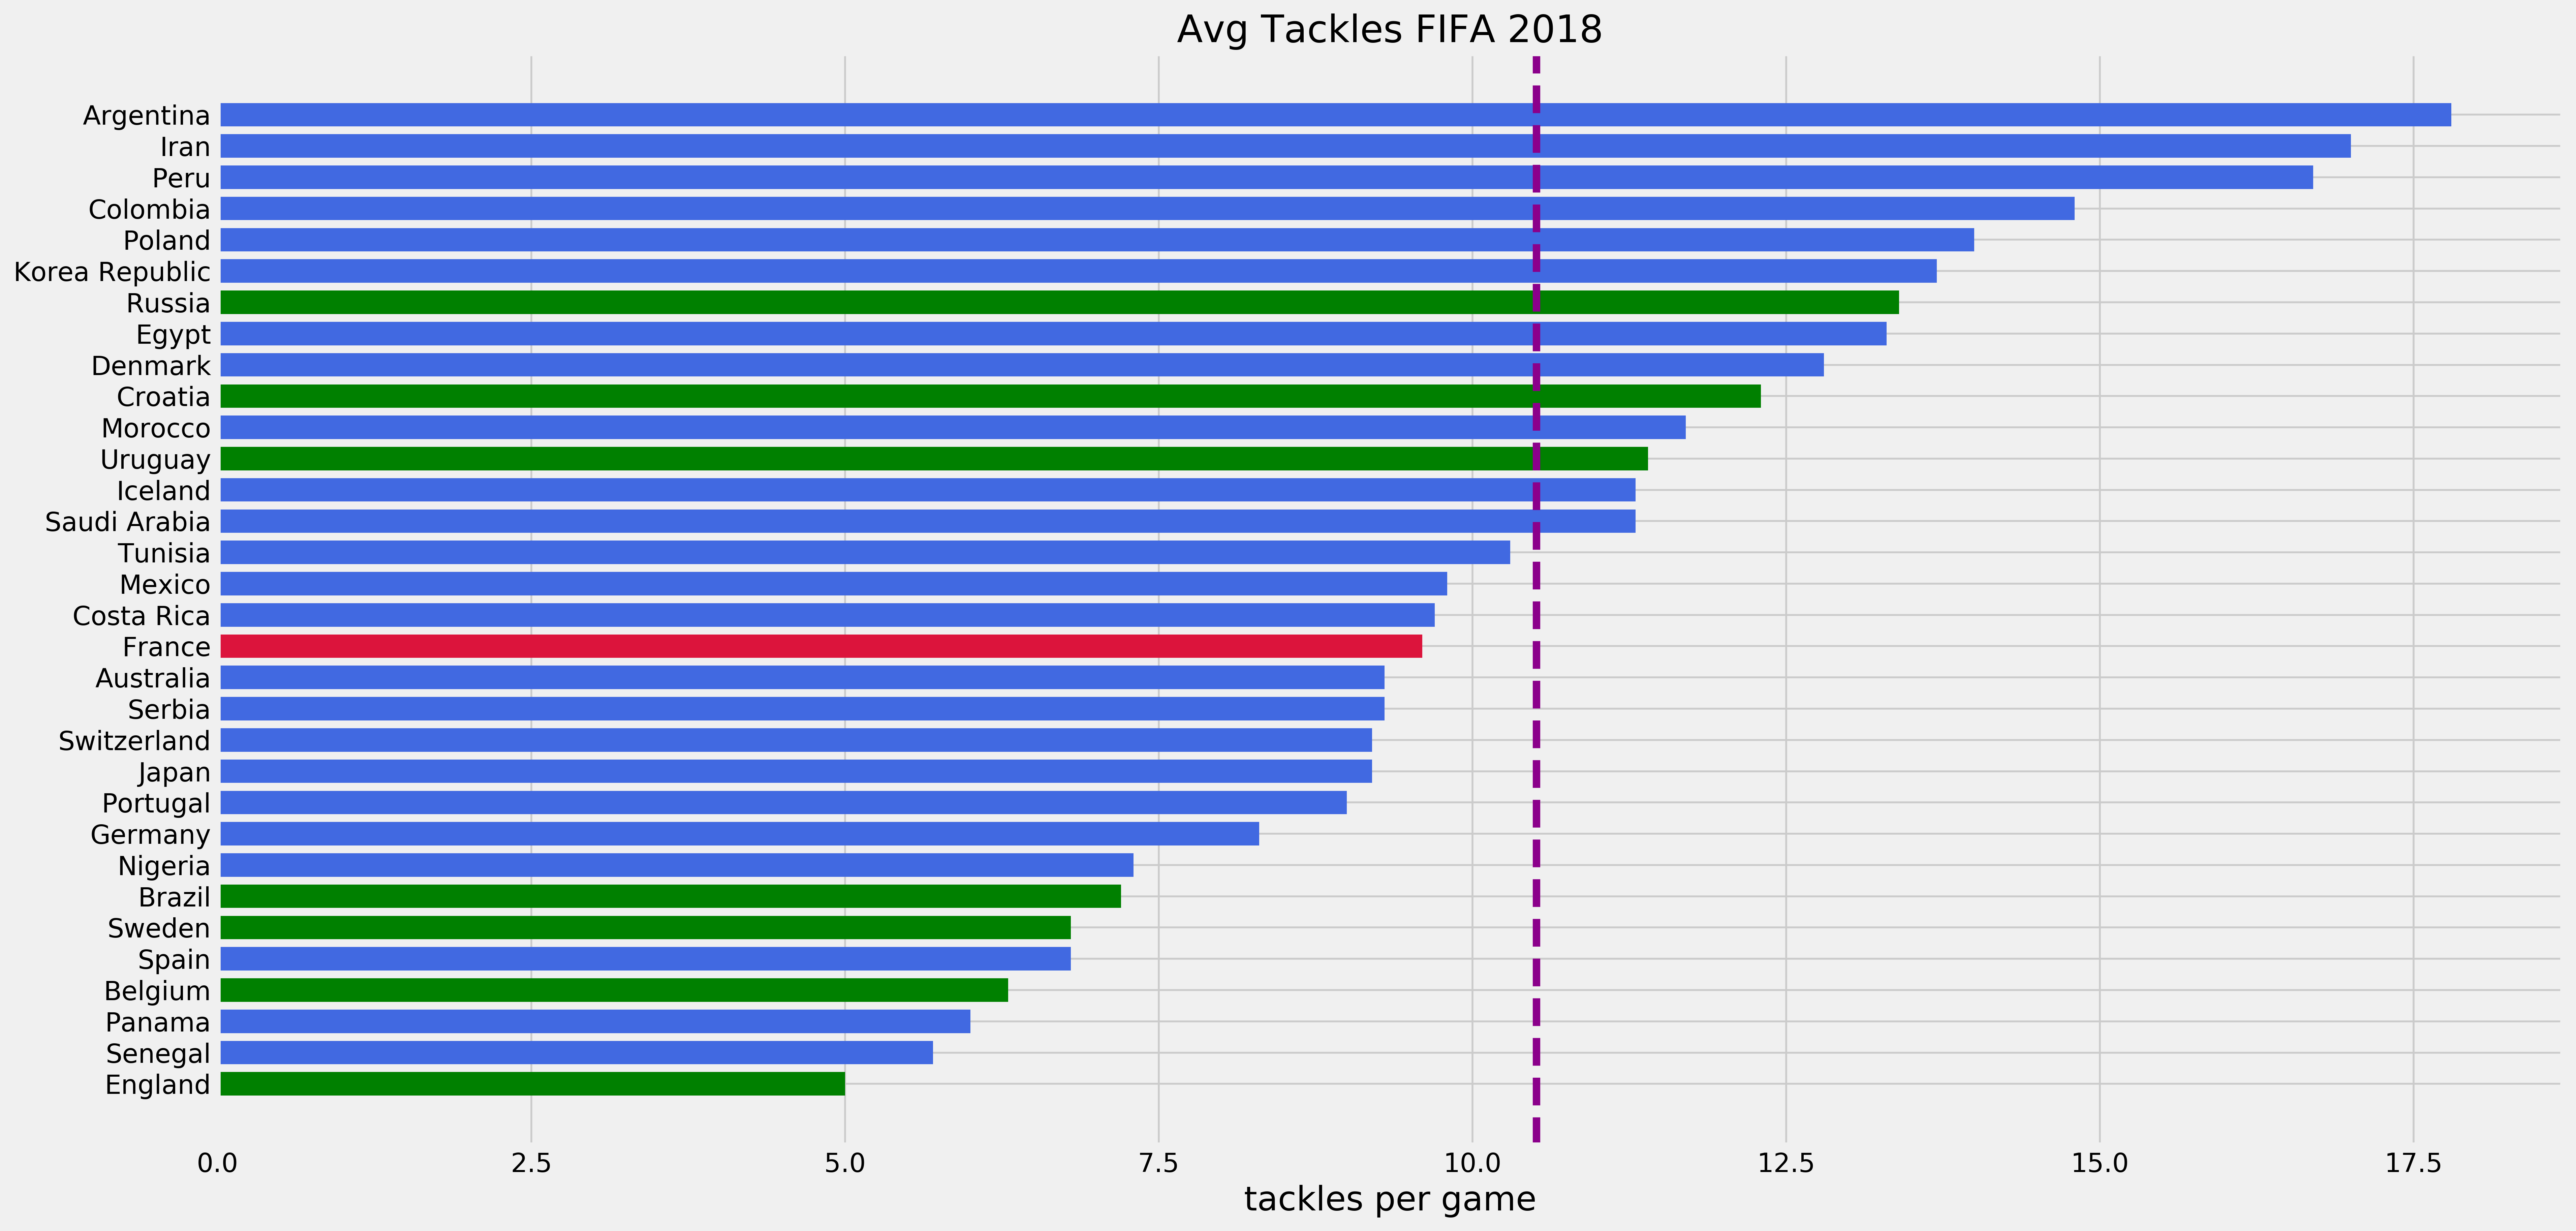

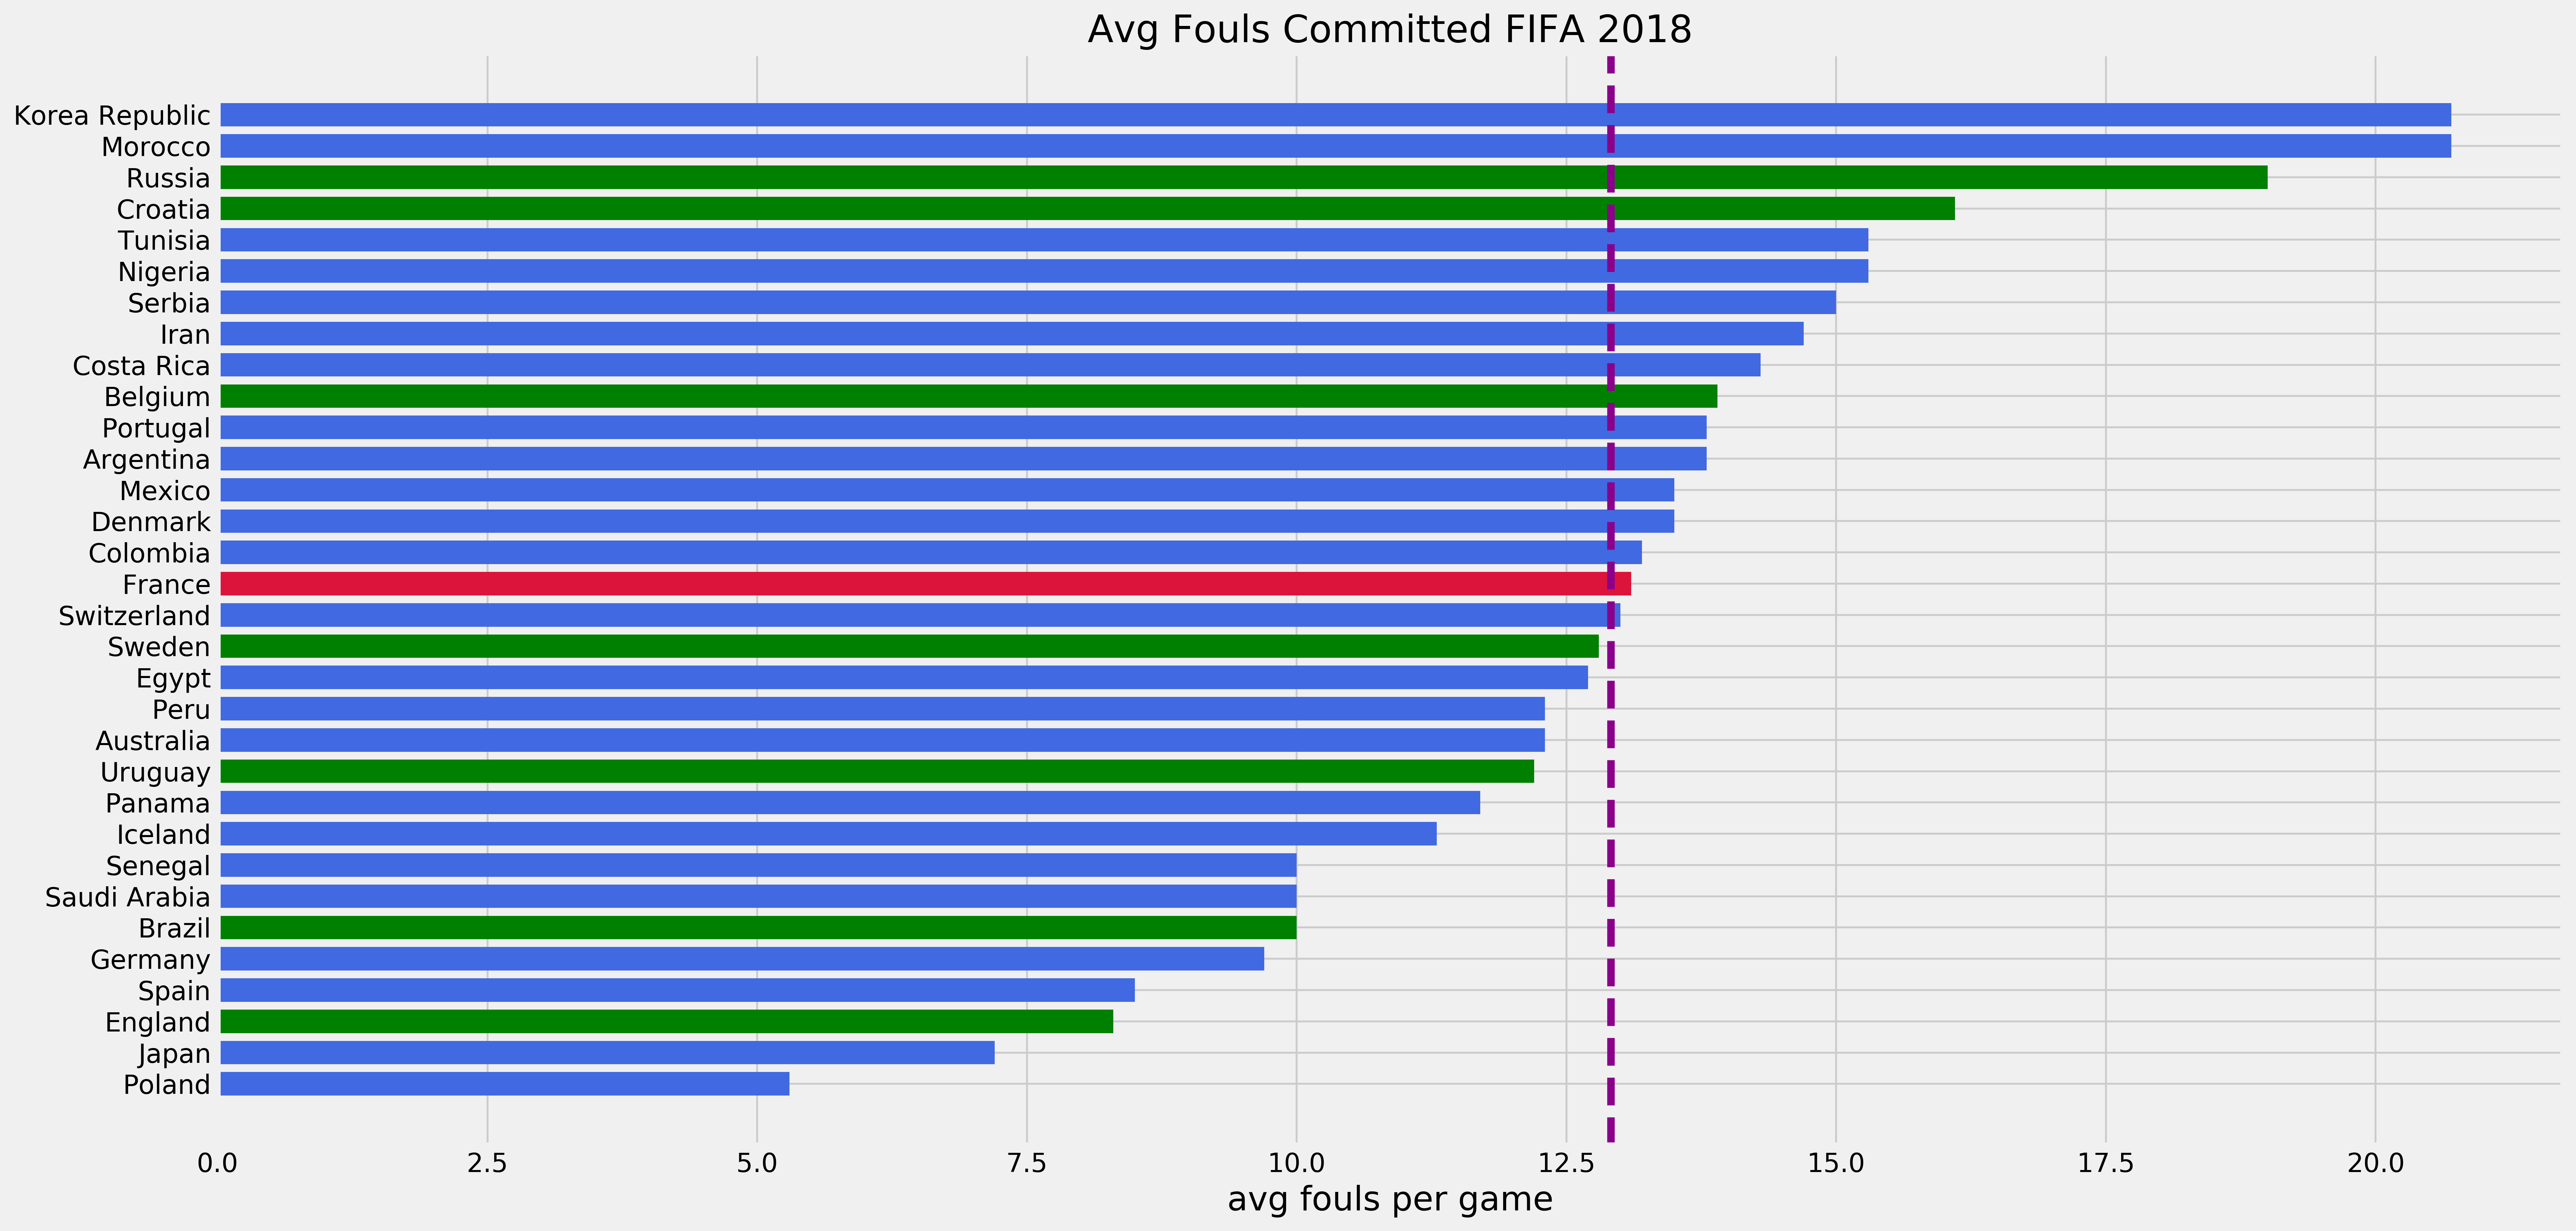

In [27]:
# rename column titles in groups DataFrame
groups.columns = ['Country', 'Passes Completed', 'Goal Attempts', 'Ball Possession', 'Pass Accuracy', 'Balls Recovered',
                  'Distance Covered', 'Tackles','Fouls Committed', 'Number of Games', 'Avg Passes Completed', 'Avg Goal Attempts',
                  'Avg Ball Possesion', 'Avg Pass Accuracy', 'Avg Balls Recovered', 'Avg Distance Covered', 'Avg Tackles', 'Avg Fouls Committed']

# make column list to iterate through in for loop
columnlist = ['Avg Passes Completed', 'Avg Goal Attempts', 'Avg Ball Possesion', 'Avg Pass Accuracy',
              'Avg Balls Recovered', 'Avg Distance Covered', 'Avg Tackles', 'Avg Fouls Committed' ]

# make x axis labels list to iterate through in for loop
x_label_list = ['passes per game', 'goal attempts per game', 'min per game', 'percentage completed per game',
                'recovered per game', ' km per game', 'tackles per game', 'avg fouls per game']

# for loop to create six graphs
for column in columnlist:  
    # plot the average shots per game
    fig, ax = plt.subplots(figsize = (20,10))
    # get plt style
    plt.style.use('fivethirtyeight')
    # set colors for graph
    groups['colors'] = 'royalblue'
    # set France to red and other top 8 to green
    groups.loc[groups["Country"]=="France",'colors'] = 'crimson'
    groups.loc[groups["Country"] == "Russia", 'colors'] = "g"
    groups.loc[groups["Country"] == "Croatia", 'colors'] = "g"
    groups.loc[groups["Country"] == "Uruguay", 'colors'] = "g"
    groups.loc[groups["Country"] == "Sweden", 'colors'] = "g"
    groups.loc[groups["Country"] == "England", 'colors'] = "g"
    groups.loc[groups["Country"] == "Brazil", 'colors'] = "g"
    groups.loc[groups["Country"] == "Belgium", 'colors'] = "g"
    
    # order grpahs by mean
    groups.sort_values(by=column, inplace=True)
    
    # set up graphs
    plt.barh(groups["Country"],
             groups[column],
             align ='center',
             color=groups.colors,
             height = .75)
    
    # set mean vertical line on each graph
    plt.axvline(groups[column].mean(), color='darkmagenta', linestyle='--')

    #set graph titles and x axis labels
    plt.xlabel(x_label_list[columnlist.index(column)], fontsize=18)
    plt.title(f"{column} FIFA 2018", 
              color = "black")

    # set y value ticks
    plt.yticks(np.arange(32),groups["Country"], rotation = 0)
    plt.savefig(f"{column} FIFA 2018.png")

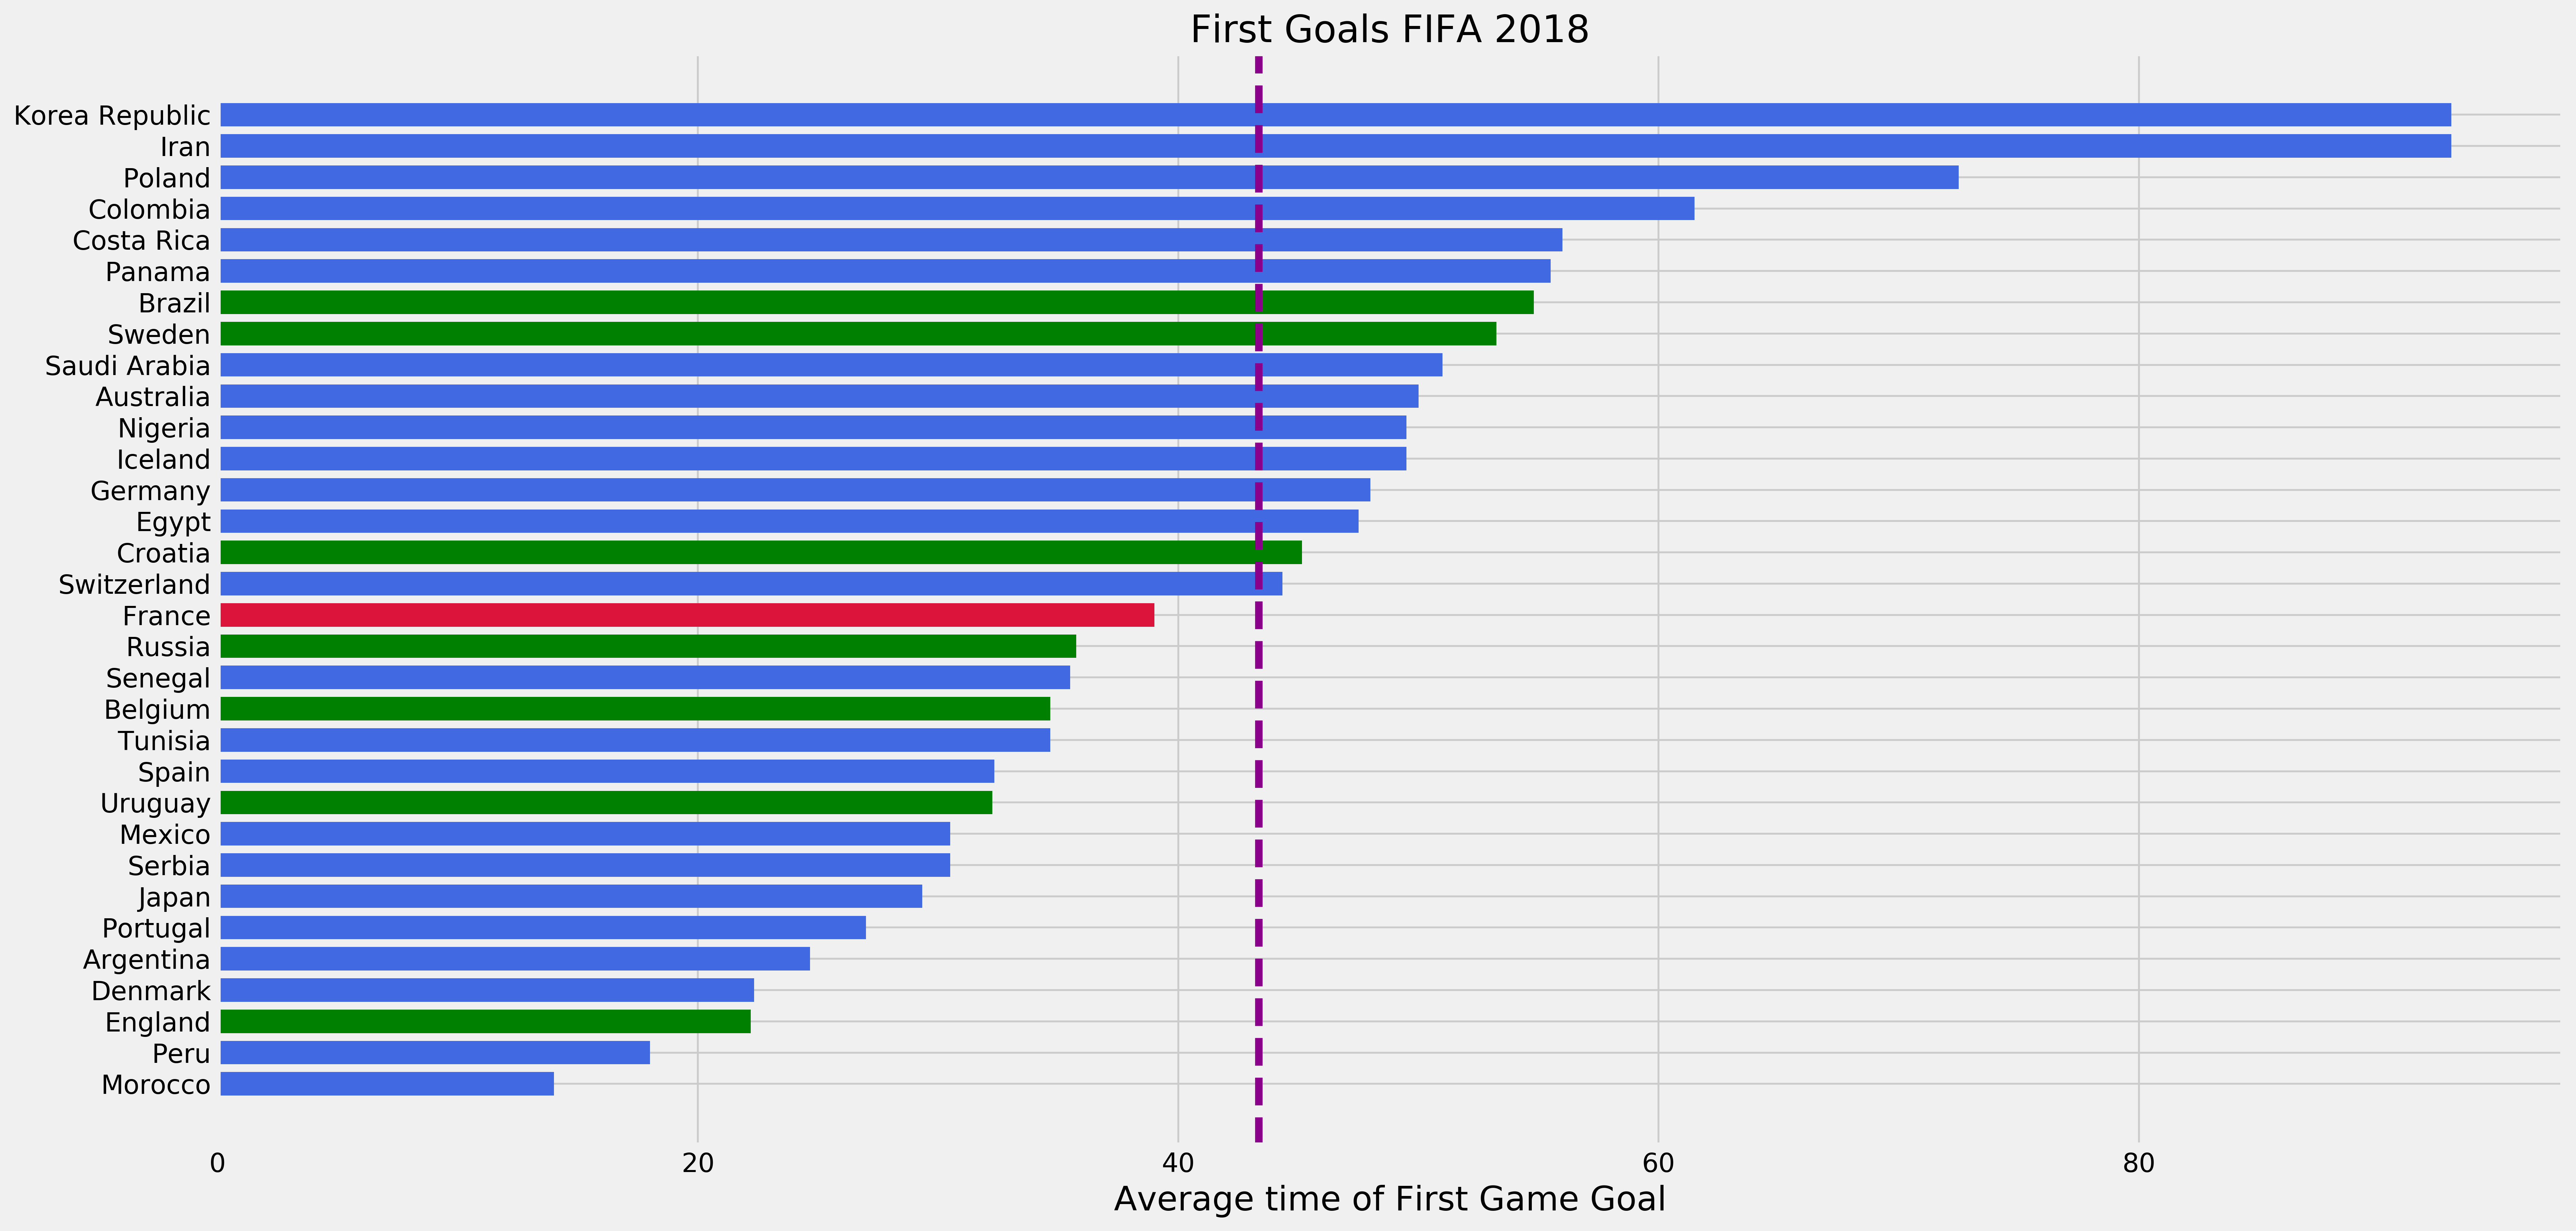

In [28]:

#plot first goal means for each team
fig, ax = plt.subplots(figsize = (20,10))
# get plt style
plt.style.use('fivethirtyeight')
# set colors for graph
goal_means['colors'] = 'royalblue'
# set France to red and other top 8 to green
goal_means.loc[goal_means["Country"]=="France",'colors'] = 'crimson'
goal_means.loc[goal_means["Country"] == "Russia", 'colors'] = "g"
goal_means.loc[goal_means["Country"] == "Croatia", 'colors'] = "g"
goal_means.loc[goal_means["Country"] == "Uruguay", 'colors'] = "g"
goal_means.loc[goal_means["Country"] == "Sweden", 'colors'] = "g"
goal_means.loc[goal_means["Country"] == "England", 'colors'] = "g"
goal_means.loc[goal_means["Country"] == "Brazil", 'colors'] = "g"
goal_means.loc[goal_means["Country"] == "Belgium", 'colors'] = "g"
    
    # order grpahs by mean
goal_means.sort_values(by='First Goals', inplace=True)
    
    # set up graphs
plt.barh(goal_means["Country"],
        goal_means["First Goals"],
         align ='center',
         color=goal_means.colors,
         height = .75)
    
    # set mean vertical line on each graph
plt.axvline(goal_means["First Goals"].mean(), color='darkmagenta', linestyle='--')

    #set graph titles and x axis labels
plt.xlabel("Average time of First Game Goal", fontsize=18)
plt.title("First Goals FIFA 2018", 
           color = "black")

    # set y value ticks
plt.yticks(np.arange(32),goal_means["Country"], rotation = 0)
plt.savefig(f"First Goals FIFA 2018.png")